In [634]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [636]:
RANDOM_STATE = 42

In [637]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/credit_scoring.csv"

In [640]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

**Целевая переменная**
- `SeriousDlqin2yrs`: клиент имел просрочку 90 и более дней

**Признаки**
- `RevolvingUtilizationOfUnsecuredLines`: общий баланс средств (total balance on credit cards and personal lines of credit except real estate and no installment debt
like car loans divided by the sum of credit limits)
- `age`: возраст заемщика
- `NumberOfTime30-59DaysPastDueNotWorse`: сколько раз за последние 2 года наблюдалась просрочка 30-59 дней
- `DebtRatio`: ежемесячные расходы (платеж по долгам, алиментам, расходы на проживания) деленные на месячный доход
- `MonthlyIncome`: ежемесячный доход
- `NumberOfOpenCreditLinesAndLoans`: количество открытых кредитов (напрмер, автокредит или ипотека) и кредитных карт
- `NumberOfTimes90DaysLate`: сколько раз наблюдалась просрочка (90 и более дней)
- `RealEstateLoansOrLines`: закодированное количество кредиов (в том числе под залог жилья) - чем больше код буквы, тем больше кредитов
- `NumberOfTime60-89DaysPastDueNotWorse`: сколько раз за последние 2 года заемщик задержал платеж на 60-89 дней
- `NumberOfDependents`: количество иждивенцев на попечении (супруги, дети и др)
- `GroupAge`: закодированная возрастная группа - чем больше код, тем больше возраст

In [642]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [643]:
# случайные три записи из датасета
df.sample(10)

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
1855                   0                              0.062016  51.0   
24928                  0                              0.034015  66.0   
35155                  0                              0.005912  50.0   
13543                  0                              0.046821  55.0   
143268                 0                              0.720507  64.0   
70864                  0                              0.010322  49.0   
81584                  0                              0.135093  56.0   
145382                 0                              0.193205  23.0   
51909                  0                              0.022223  38.0   
39923                  0                              0.841763  41.0   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
1855                                       0     0.157584        10000.0   
24928                                      0  3164.000000            NaN   
35155                                      0     0.363751         9500.0   
13543                                      0     0.007613         8800.0   
143268                                     0     1.854128         2700.0   
70864                                      0     0.231479         4440.0   
81584                                      0     0.674317         1829.0   
145382                                     0     0.008602          929.0   
51909                                      0     0.287033         4333.0   
39923                                      0     0.392401        10185.0   

        NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1855                                 11                        0   
24928                                18                        0   
35155                                 8                        0   
13543                                 5                        0   
143268                               13                        0   
70864                                 7                        0   
81584                                 4                        0   
145382                                2                        0   
51909                                 8                        0   
39923                                 9                        0   

        NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  \
1855                                       0                 1.0   
24928                                      0                 1.0   
35155                                      0                 4.0   
13543                                      0                 0.0   
143268                                     0                 0.0   
70864                                      0                 0.0   
81584                                      0                 0.0   
145382                                     0                 0.0   
51909                                      0                 0.0   
39923                                      0                 0.0   

       RealEstateLoansOrLines GroupAge  
1855                        A        d  
24928                       A        e  
35155                       A        d  
13543                       A        d  
143268                      B        d  
70864                       A        c  
81584                       A        d  
145382                      A        b  
51909                       A        c  
39923                       A        c

In [644]:
df.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  135155.000000   
mean           0.066840                              6.048438      52.293618   
std            0.249746                            249.755371      14.772577   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2037.818523   1.438467e+04   
min                                0.000000       0.000000   0.000000e+00   
25%                                0.000000       0.175074   3.400000e+03   
50%                                0.000000       0.366508   5.400000e+03   
75%                                0.000000       0.868254   8.249000e+03   
max                               98.000000  329664.000000   3.008750e+06   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    150000.000000            150000.000000   
mean                          8.452760                 0.265973   
std                           5.145951                 4.169304   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [645]:
df.describe(include=object)

RealEstateLoansOrLines GroupAge
count                  150000   150000
unique                      5        5
top                         A        d
freq                   140048    47268

In [646]:
# categorical = ['RealEstateLoansOrLines', 'GroupAge']
# aim = ['SeriousDlqin2yrs']
# numerical = [feature for feature in df.columns if feature not in categorical and feature not in aim]

# for feature in numerical:
#     plt.hist(df[feature], bins=50, log=1)
#     plt.title(feature)
#     plt.show()

In [647]:
aim_df = df[df[aim[0]] == 1]

In [648]:
df.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  135155.000000   
mean           0.066840                              6.048438      52.293618   
std            0.249746                            249.755371      14.772577   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2037.818523   1.438467e+04   
min                                0.000000       0.000000   0.000000e+00   
25%                                0.000000       0.175074   3.400000e+03   
50%                                0.000000       0.366508   5.400000e+03   
75%                                0.000000       0.868254   8.249000e+03   
max                               98.000000  329664.000000   3.008750e+06   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                    150000.000000            150000.000000   
mean                          8.452760                 0.265973   
std                           5.145951                 4.169304   
min                           0.000000                 0.000000   
25%                           5.000000                 0.000000   
50%                           8.000000                 0.000000   
75%                          11.000000                 0.000000   
max                          58.000000                98.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                         150000.000000       146076.000000  
mean                               0.240387            0.757222  
std                                4.155179            1.115086  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                0.000000            1.000000  
max                               98.000000           20.000000

In [649]:
aim_df.describe()

SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines          age  \
count           10026.0                          10026.000000  9026.000000   
mean                1.0                              4.367282    45.885110   
std                 0.0                            131.835778    12.918324   
min                 1.0                              0.000000    21.000000   
25%                 1.0                              0.398219    36.000000   
50%                 1.0                              0.838853    45.000000   
75%                 1.0                              1.000000    54.000000   
max                 1.0                           8328.000000   101.000000   

       NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  MonthlyIncome  \
count                           10026.00000  10026.000000    8357.000000   
mean                                2.38849    295.121066    5630.826493   
std                                11.73451   1238.360283    6171.719674   
min                                 0.00000      0.000000       0.000000   
25%                                 0.00000      0.193979    2963.000000   
50%                                 0.00000      0.428227    4500.000000   
75%                                 2.00000      0.892371    6800.000000   
max                                98.00000  38793.000000  250000.000000   

       NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
count                     10026.000000             10026.000000   
mean                          7.882306                 2.091362   
std                           5.653601                11.762760   
min                           0.000000                 0.000000   
25%                           4.000000                 0.000000   
50%                           7.000000                 0.000000   
75%                          11.000000                 1.000000   
max                          57.000000                98.000000   

       NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents  
count                          10026.000000         9847.000000  
mean                               1.828047            0.948208  
std                               11.753068            1.219367  
min                                0.000000            0.000000  
25%                                0.000000            0.000000  
50%                                0.000000            0.000000  
75%                                1.000000            2.000000  
max                               98.000000            8.000000

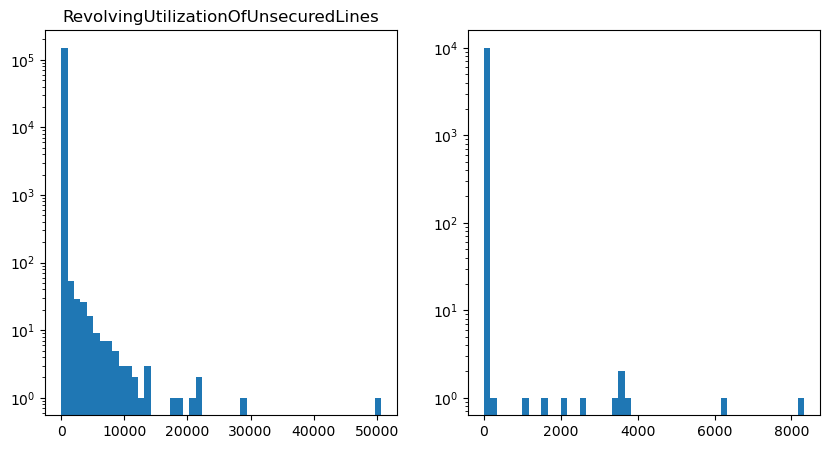

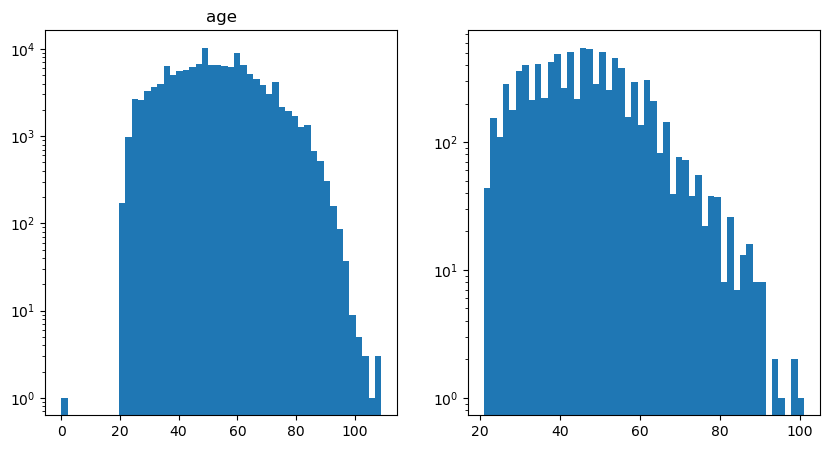

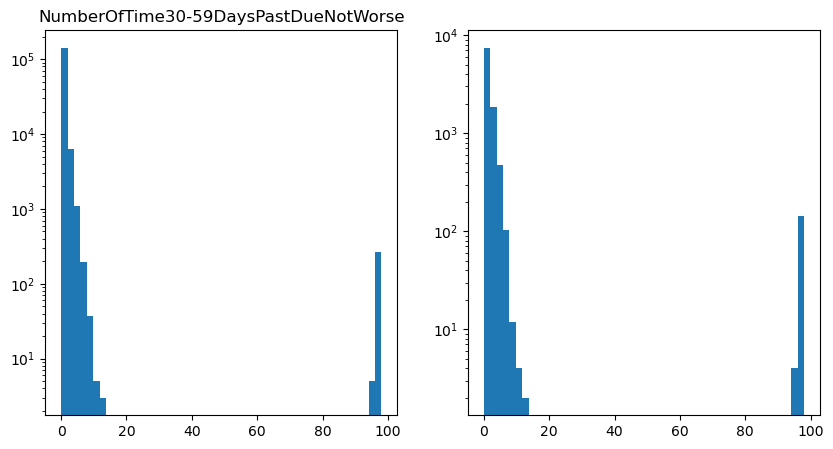

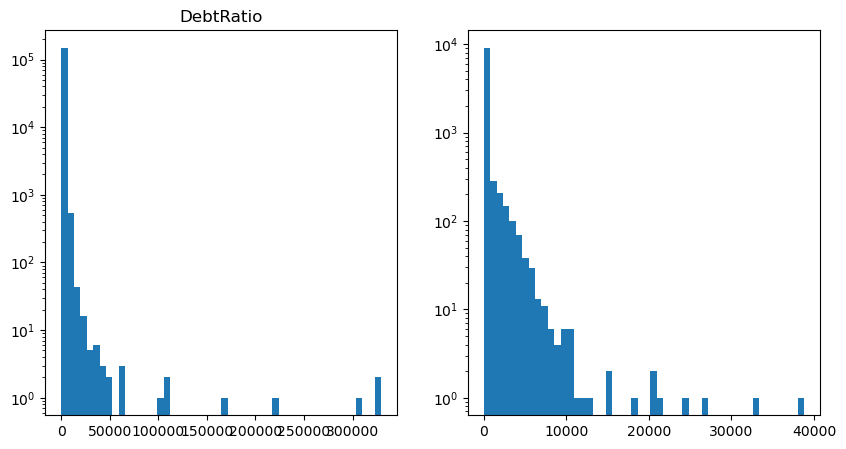

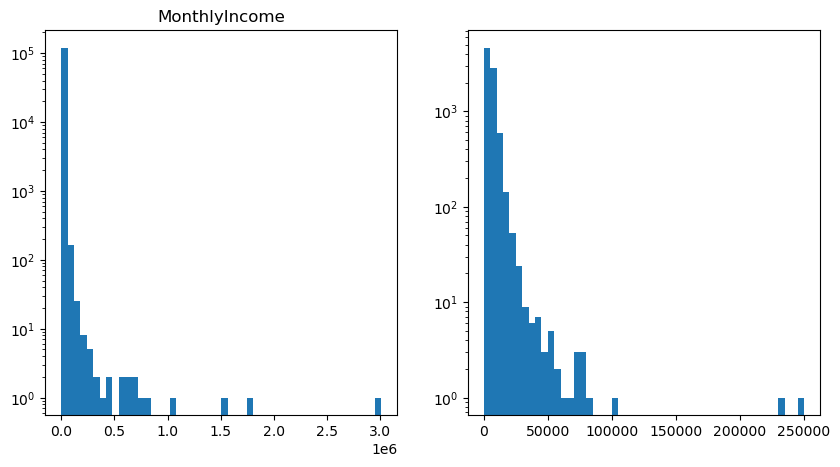

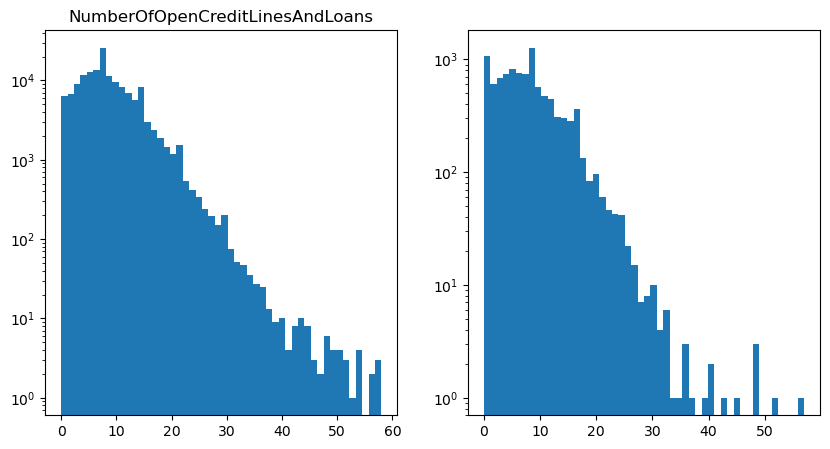

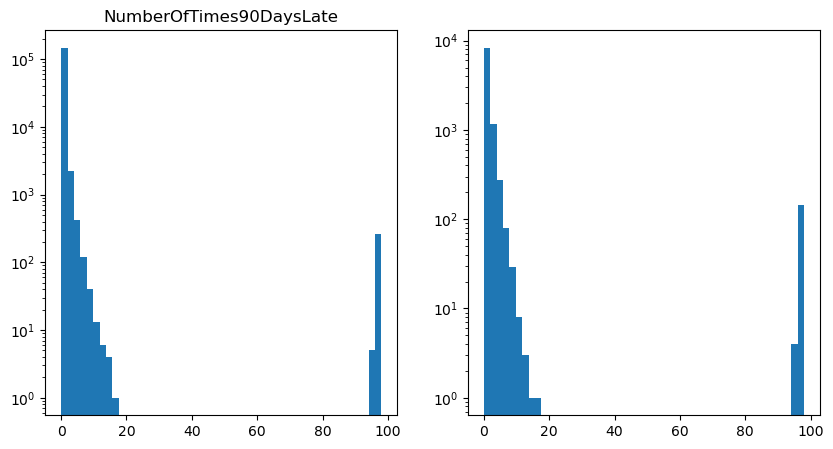

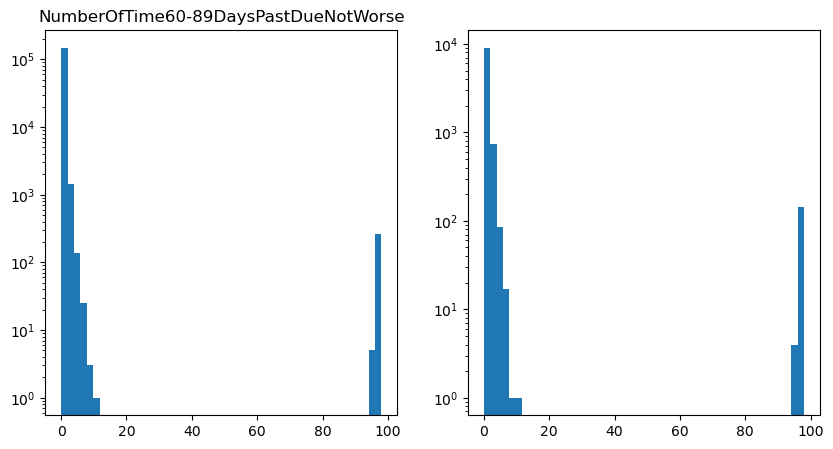

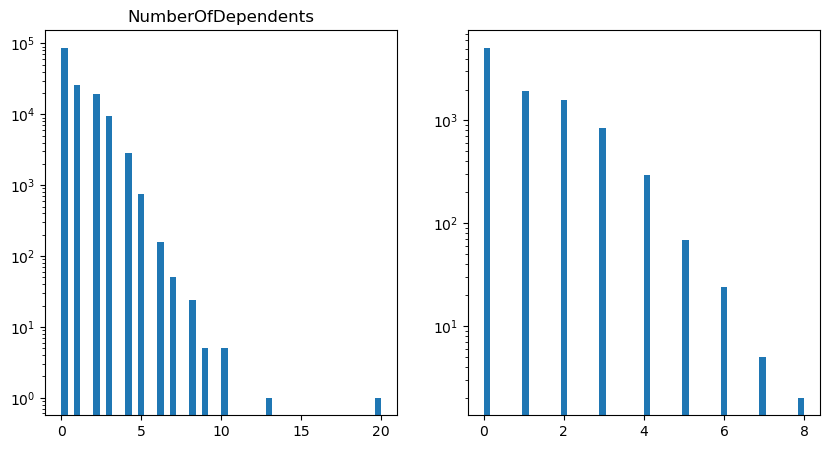

In [650]:
for feature in numerical:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
    
    ax1.hist(df[feature], bins=50, log=1)
    ax1.set_title(feature)
    ax2.hist(aim_df[feature], bins=50, log=1)
    plt.show()

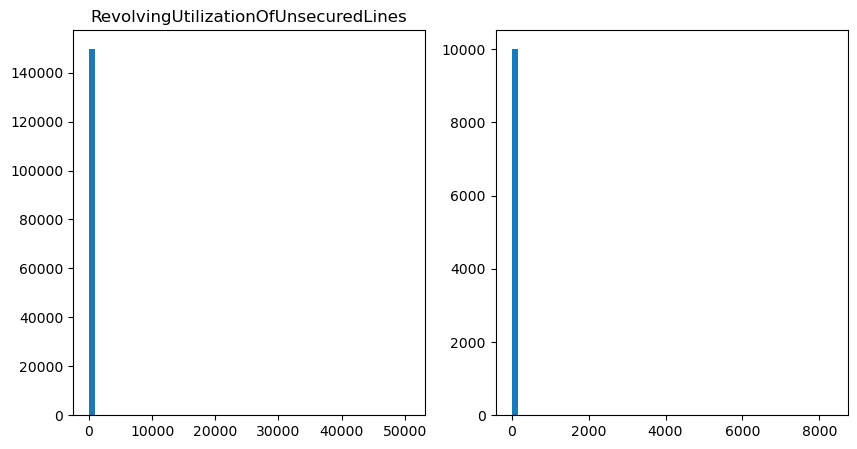

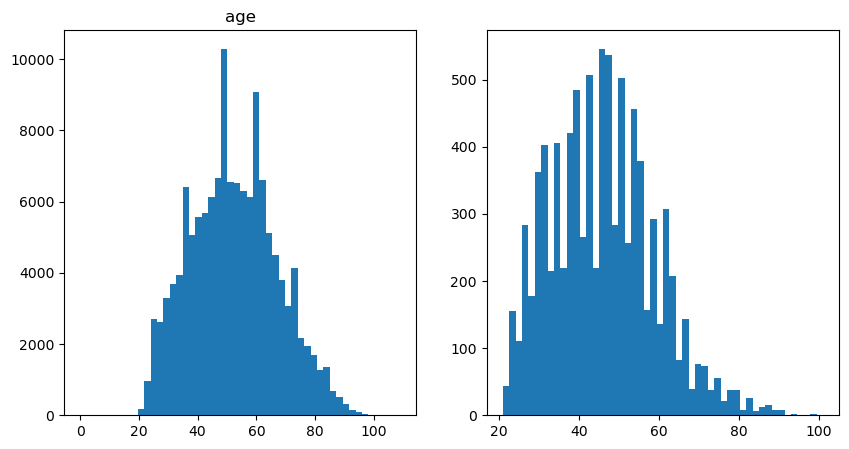

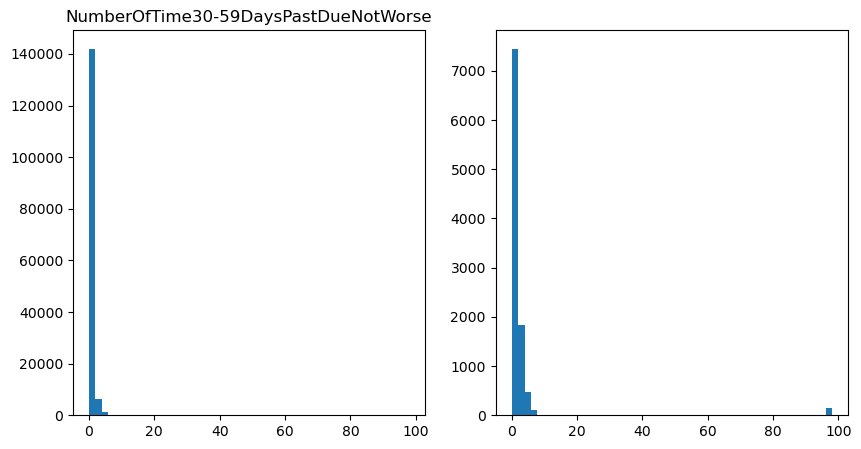

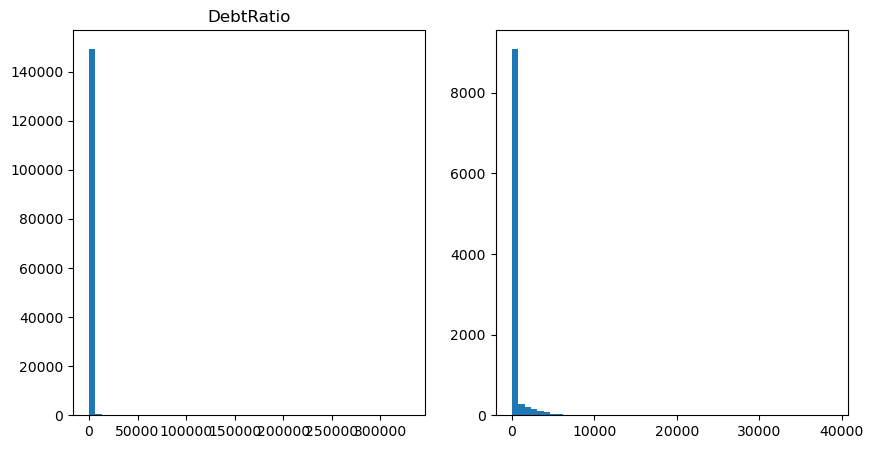

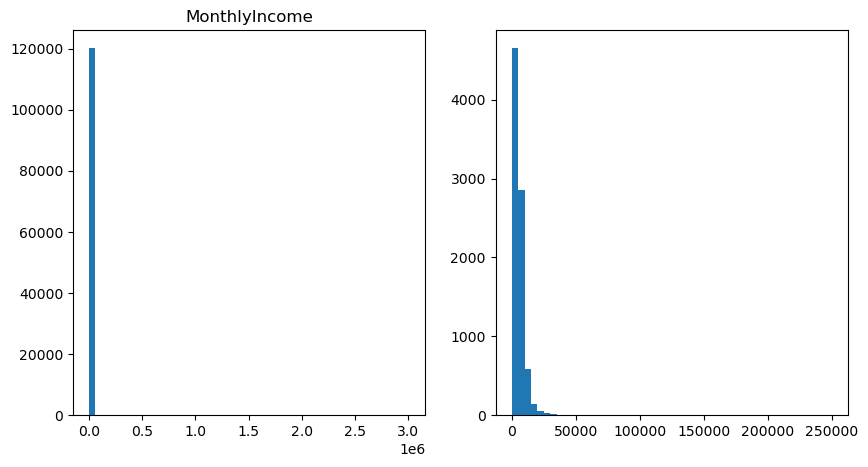

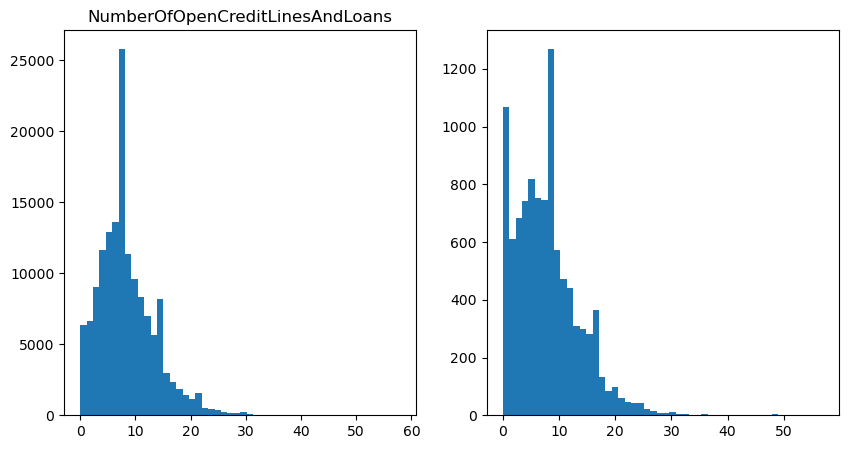

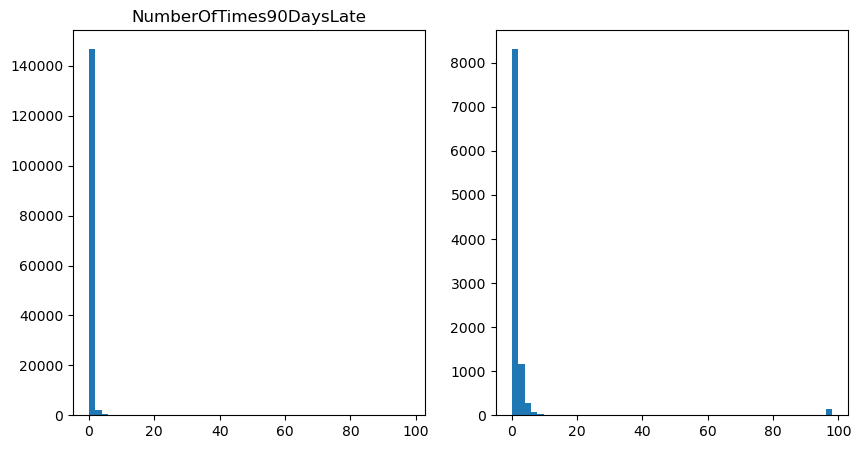

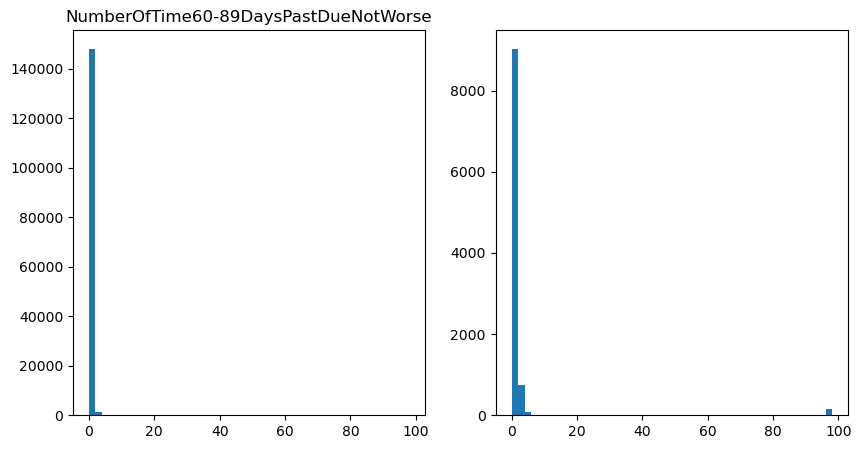

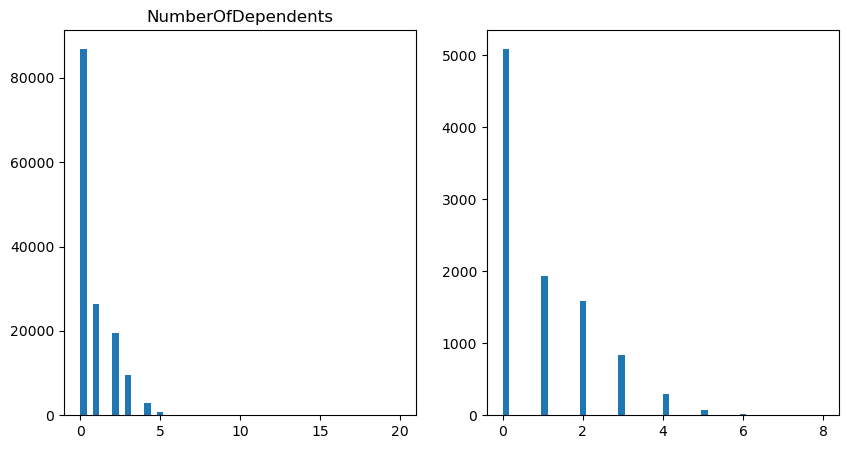

In [651]:
for feature in numerical:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
    
    ax1.hist(df[feature], bins=50)
    ax1.set_title(feature)
    ax2.hist(aim_df[feature], bins=50)
    plt.show()

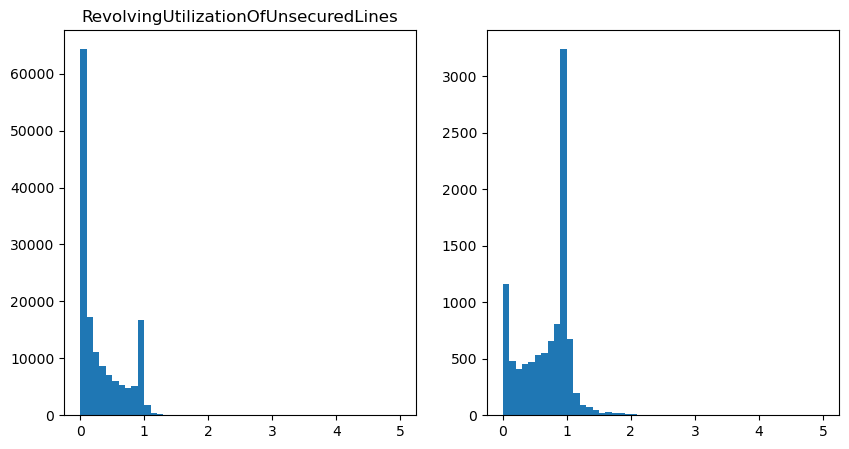

292
29


In [652]:
feature = numerical[0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(df[feature], bins=50, range=[0, 5])
ax1.set_title(feature)
ax2.hist(aim_df[feature], bins=50, range=[0, 5])
plt.show()

print(np.sum(df[feature] > 3))
print(np.sum(aim_df[feature] > 3))

In [653]:
df[feature].mean()

6.048438054666887

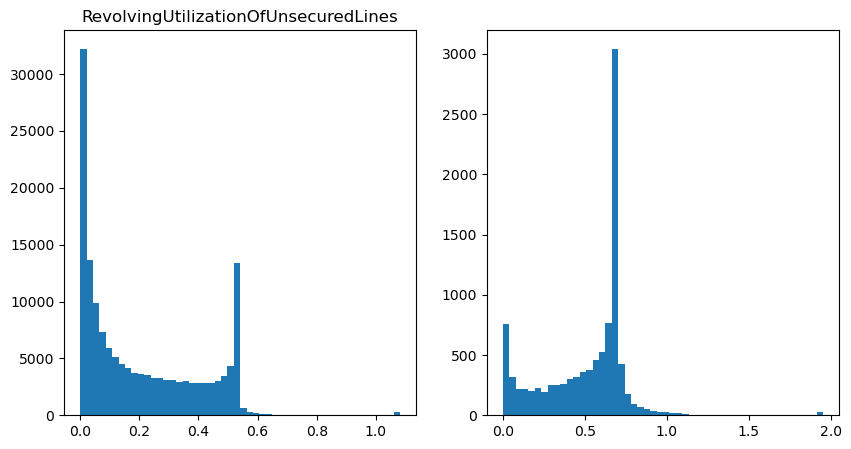

In [654]:
prep_df = df.copy()
prep_aim_df = aim_df.copy()
prep_df.loc[prep_df[feature] > 3, feature] = df[feature].mean()
prep_aim_df.loc[prep_aim_df[feature] > 3, feature] = df[feature].mean()
prep_df[feature] = np.log1p(prep_df[feature])
prep_aim_df[feature] = np.log1p(prep_aim_df[feature])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(np.log1p(prep_df[feature]), bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

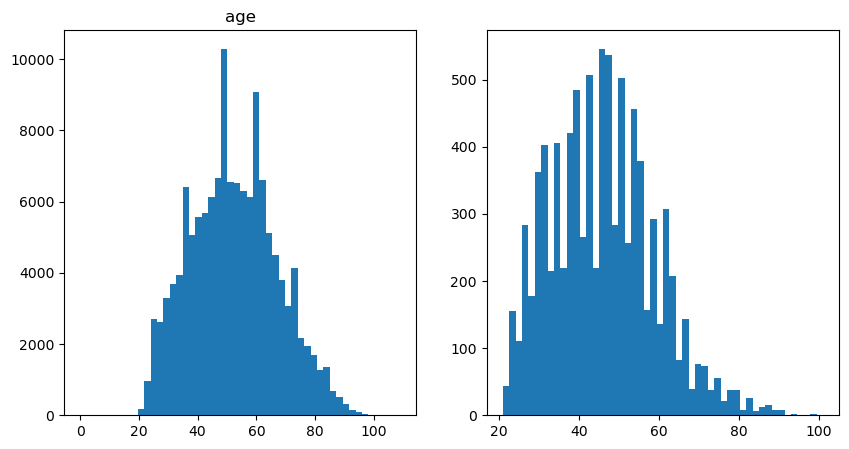

1
9026


In [655]:
feature = numerical[1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(aim_df[feature], bins=50)
plt.show()

print(np.sum(df[feature] < 19))
print(np.sum(aim_df[feature] > 3))

In [656]:
print(prep_df[feature].describe())
print(prep_aim_df[feature].describe())

count    135155.000000
mean         52.293618
std          14.772577
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64
count    9026.000000
mean       45.885110
std        12.918324
min        21.000000
25%        36.000000
50%        45.000000
75%        54.000000
max       101.000000
Name: age, dtype: float64


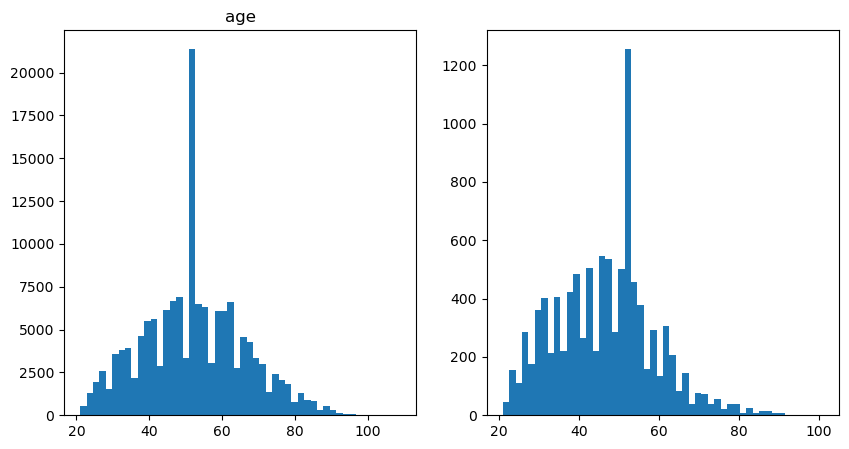

In [657]:
prep_df.loc[prep_df[feature] < 19, feature] = df[feature].mean()
prep_df.fillna(df[feature].mean(), inplace=True)
prep_aim_df.fillna(df[feature].mean(), inplace=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

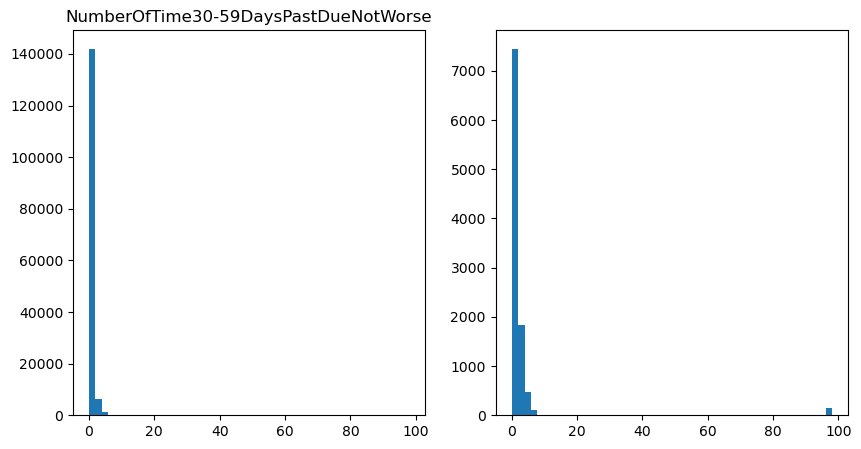

273
150


In [658]:
feature = numerical[2]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(aim_df[feature], bins=50)
plt.show()

print(np.sum(df[feature] > 10))
print(np.sum(aim_df[feature] > 10))

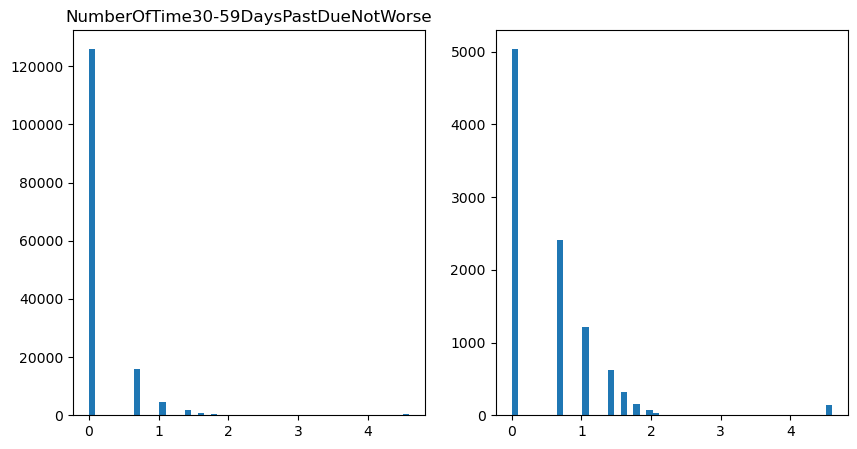

In [659]:
prep_df[feature] = np.log1p(df[feature])
prep_aim_df[feature] = np.log1p(aim_df[feature])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

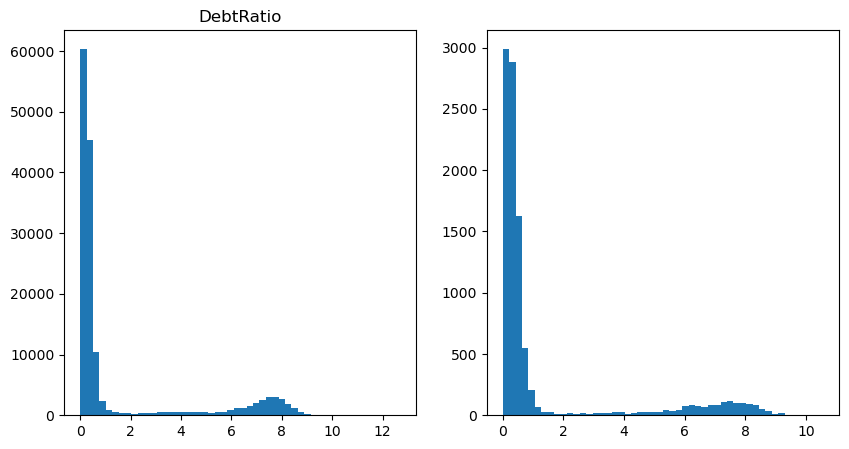

1481
112


In [660]:
feature = numerical[3]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(np.log1p(df[feature]), bins=50)
ax1.set_title(feature)
ax2.hist(np.log1p(aim_df[feature]), bins=50)
plt.show()

print(np.sum(df[feature] > 5000))
print(np.sum(aim_df[feature] > 5000))

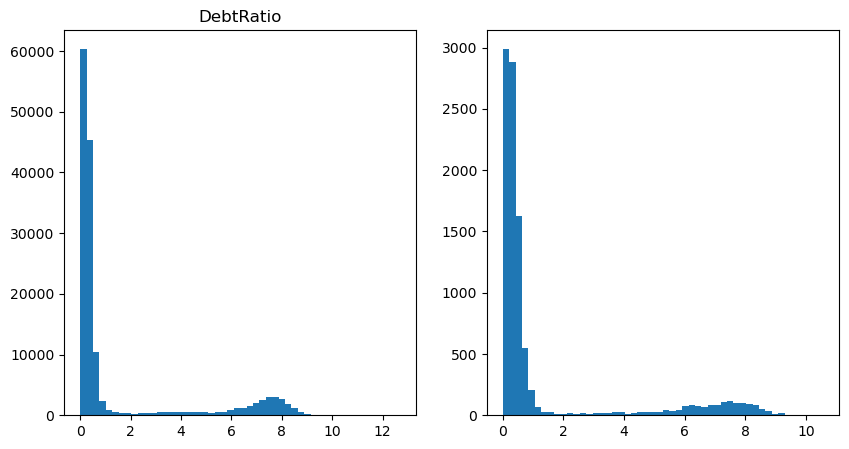

In [661]:
prep_df[feature] = np.log1p(df[feature])
prep_aim_df[feature] = np.log1p(aim_df[feature])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

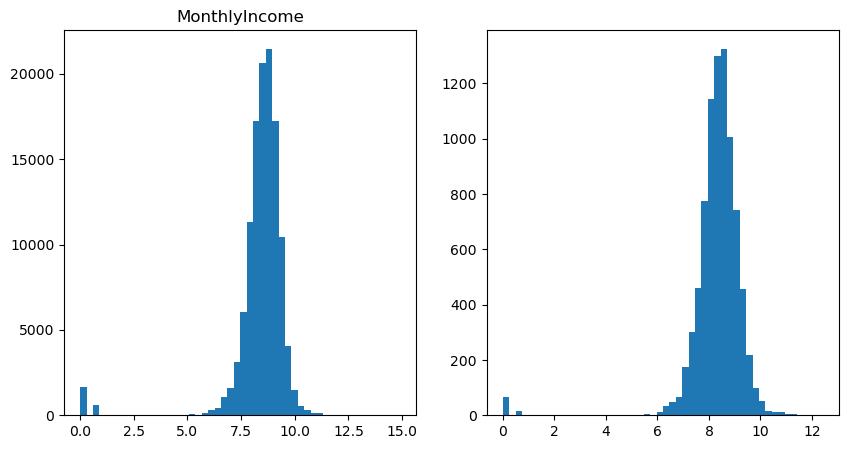

802220838.0
3544


In [662]:
feature = numerical[4]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(np.log1p(df[feature]), bins=50)
ax1.set_title(feature)
ax2.hist(np.log1p(aim_df[feature]), bins=50)
plt.show()

print(np.sum(df[feature] ))
print(np.sum(aim_df[feature] > 5000))

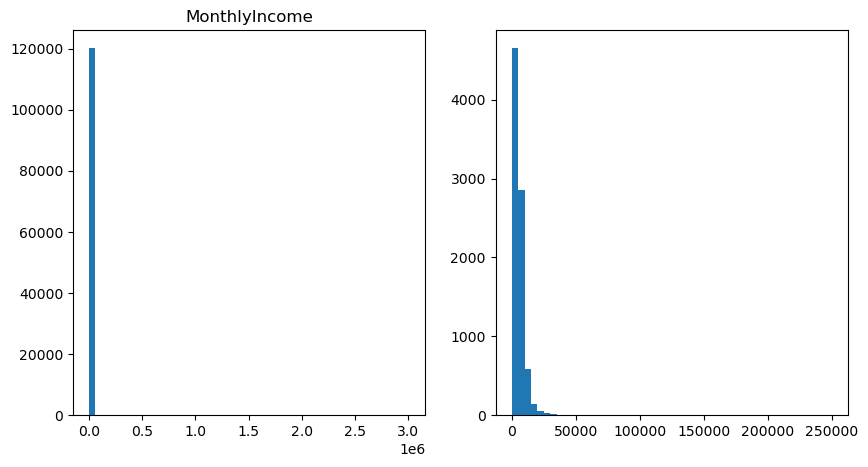

12
3544


In [663]:
feature = numerical[4]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(aim_df[feature], bins=50)
plt.show()

print(np.sum(df[feature] > 500000))
print(np.sum(aim_df[feature] > 5000))

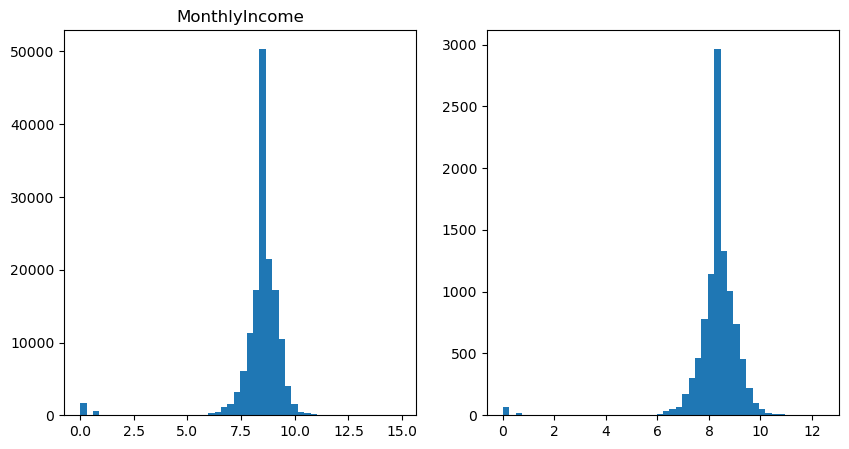

In [664]:
prep_df[feature] = np.log1p(df[feature])
prep_aim_df[feature] = np.log1p(aim_df[feature])
prep_df.fillna(prep_df[feature].mean(), inplace=True)
prep_aim_df.fillna(prep_df[feature].mean(), inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

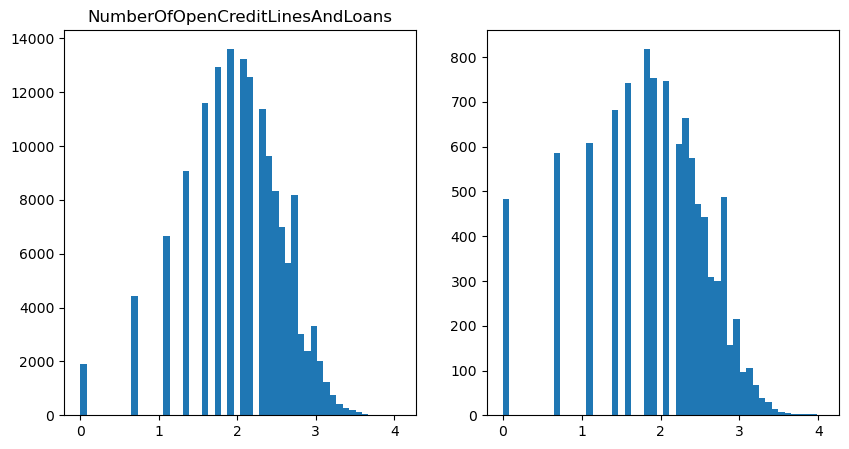

In [665]:
feature = numerical[5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(np.log1p(df[feature]), bins=50)
ax1.set_title(feature)
ax2.hist(np.log1p(aim_df[feature]), bins=50)
plt.show()

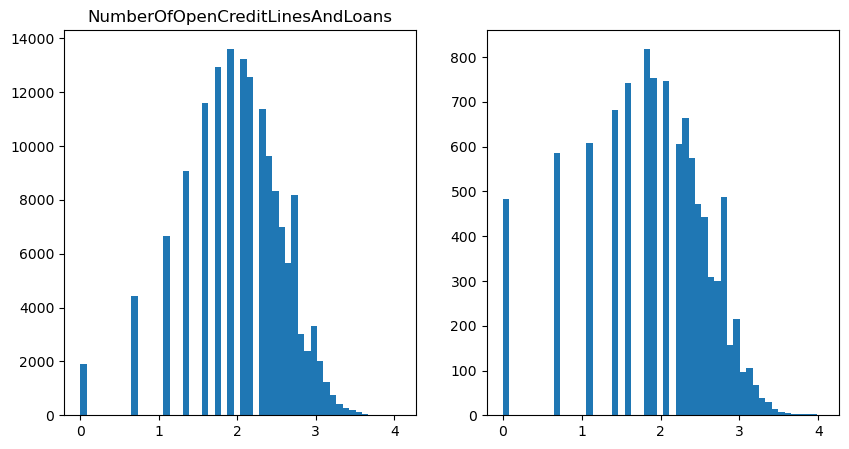

In [666]:
prep_df[feature] = np.log1p(df[feature])
prep_aim_df[feature] = np.log1p(aim_df[feature])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

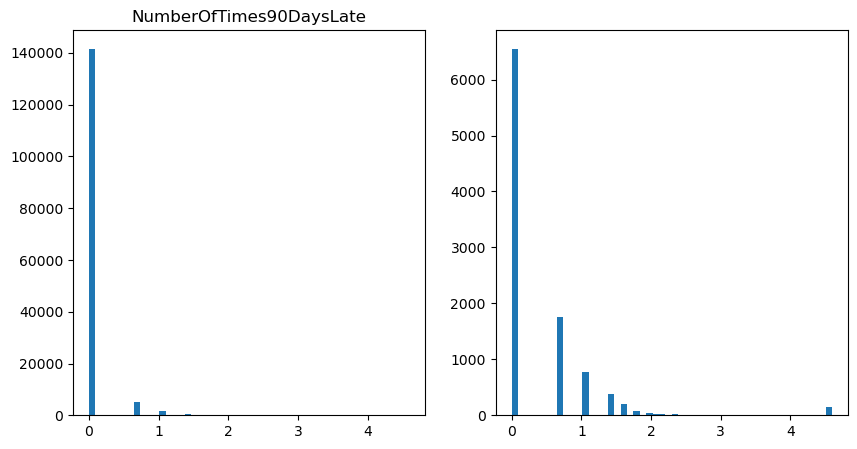

In [667]:
feature = numerical[6]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(np.log1p(df[feature]), bins=50)
ax1.set_title(feature)
ax2.hist(np.log1p(aim_df[feature]), bins=50)
plt.show()

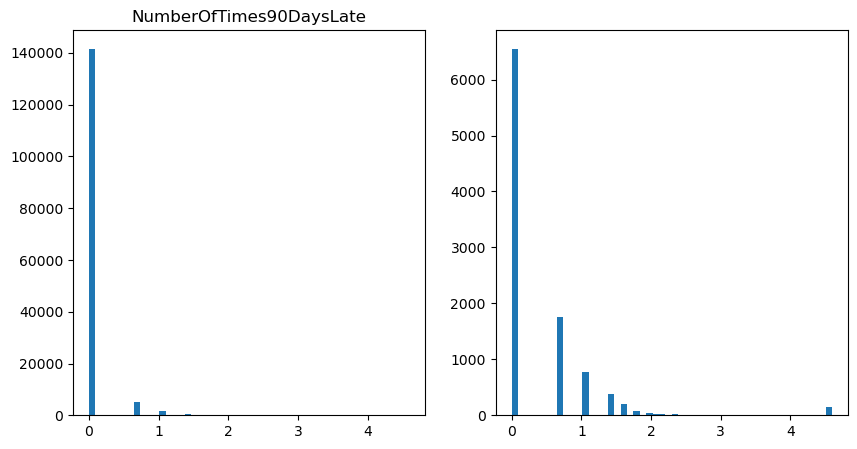

In [668]:
prep_df[feature] = np.log1p(df[feature])
prep_aim_df[feature] = np.log1p(aim_df[feature])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

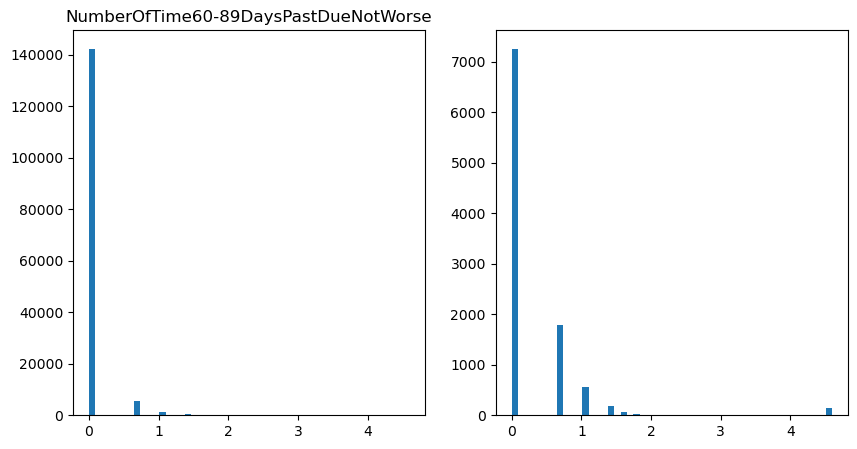

In [669]:
feature = numerical[7]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(np.log1p(df[feature]), bins=50)
ax1.set_title(feature)
ax2.hist(np.log1p(aim_df[feature]), bins=50)
plt.show()

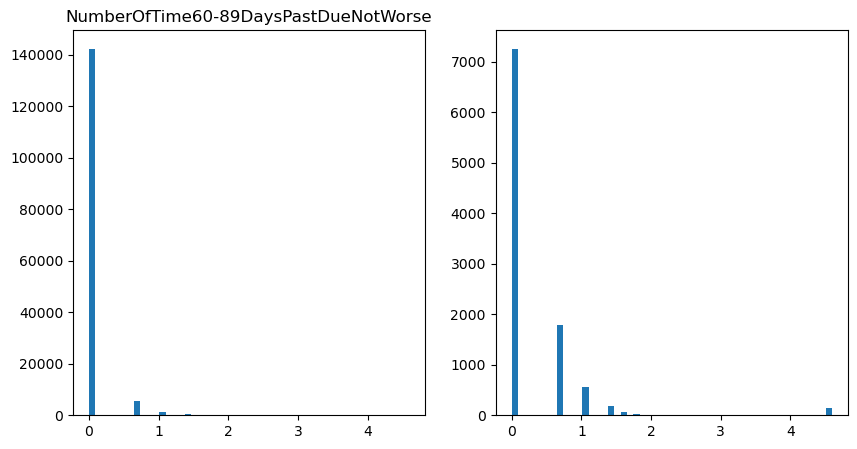

In [670]:
prep_df[feature] = np.log1p(df[feature])
prep_aim_df[feature] = np.log1p(aim_df[feature])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

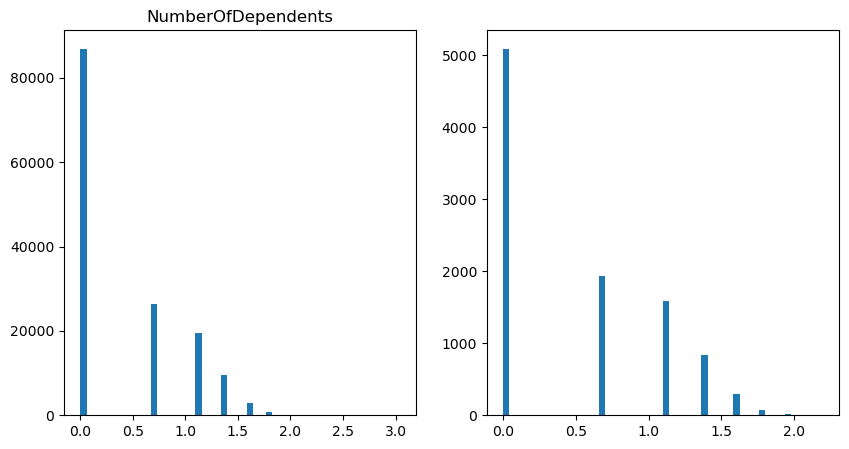

In [671]:
feature = numerical[8]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 

ax1.hist(np.log1p(df[feature]), bins=50)
ax1.set_title(feature)
ax2.hist(np.log1p(aim_df[feature]), bins=50)
plt.show()

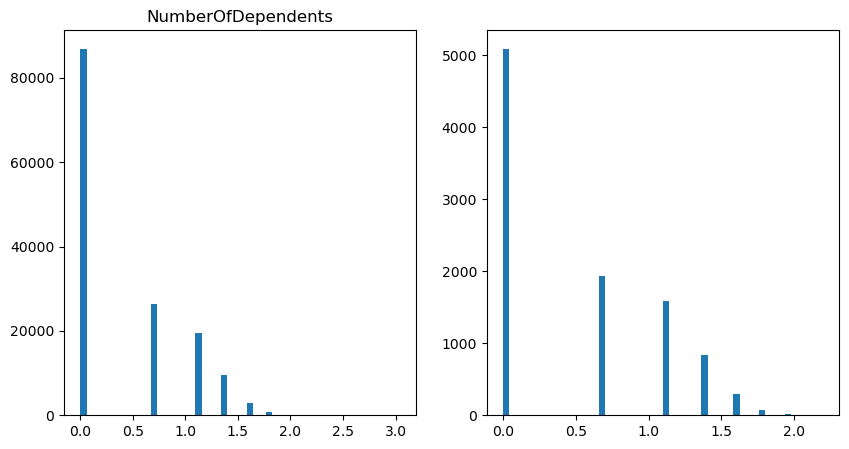

In [672]:
prep_df[feature] = np.log1p(df[feature])
prep_aim_df[feature] = np.log1p(aim_df[feature])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
ax1.hist(prep_df[feature], bins=50)
ax1.set_title(feature)
ax2.hist(prep_aim_df[feature], bins=50)
plt.show()

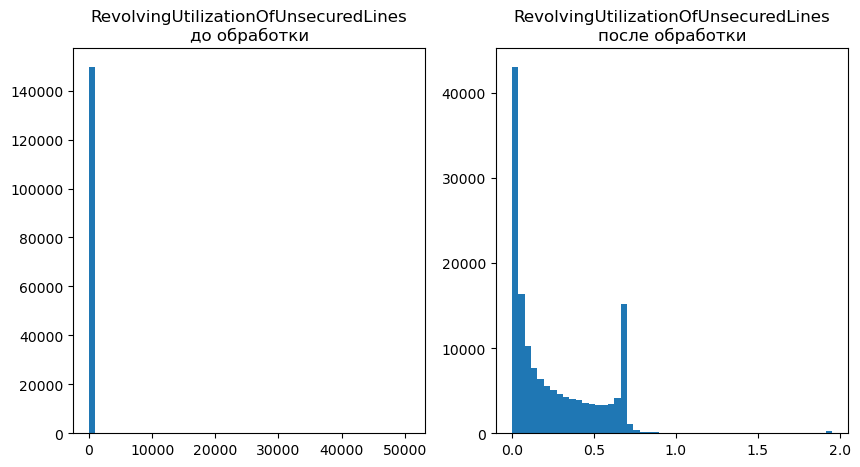

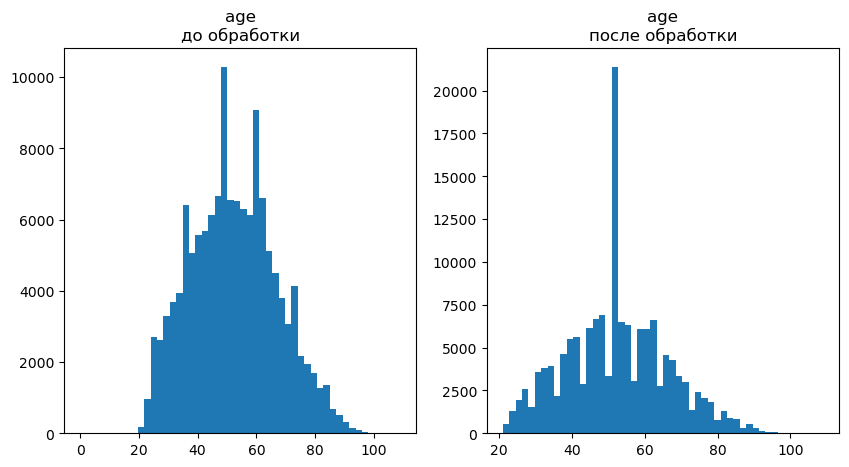

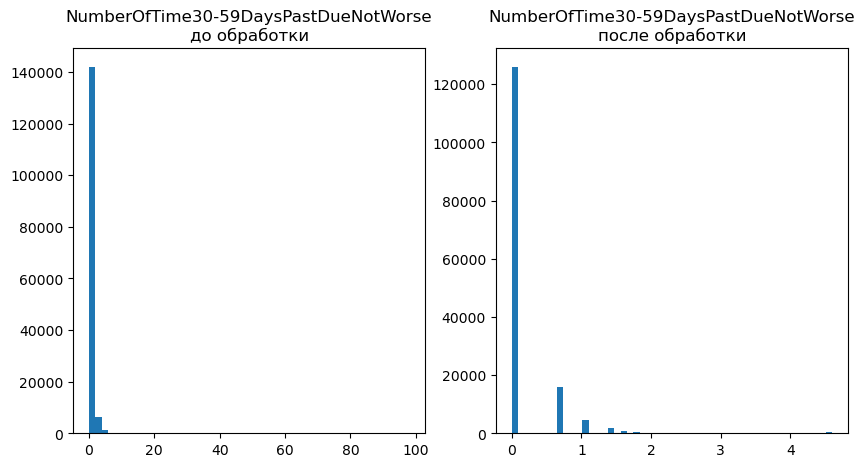

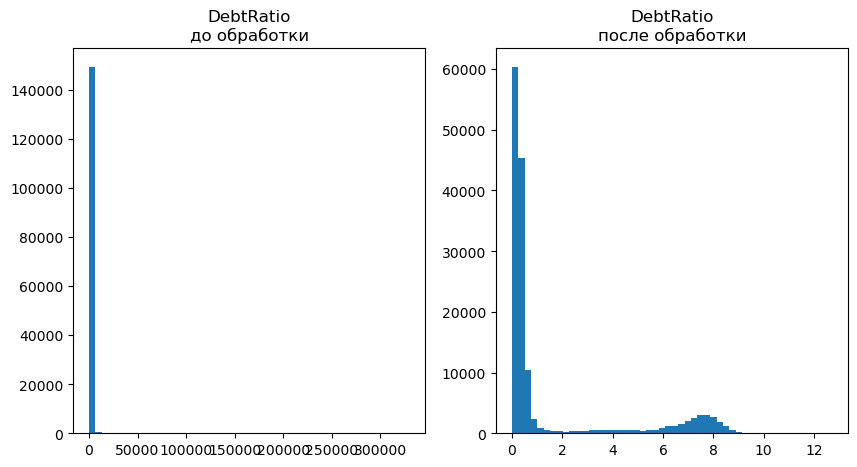

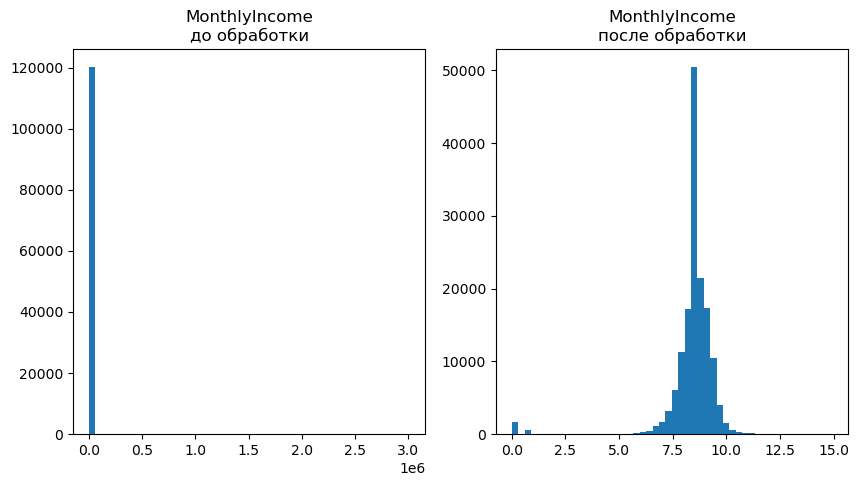

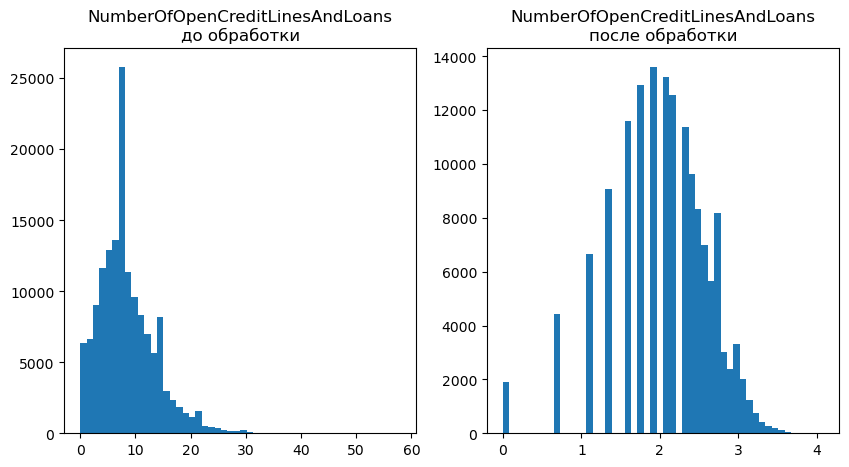

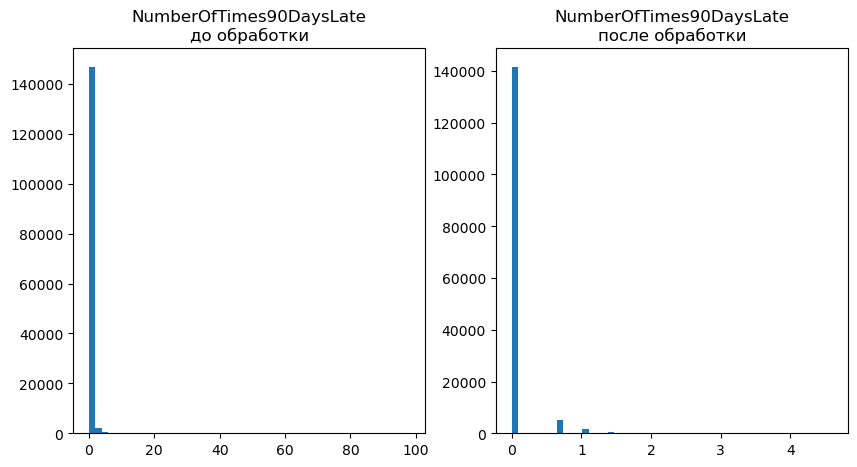

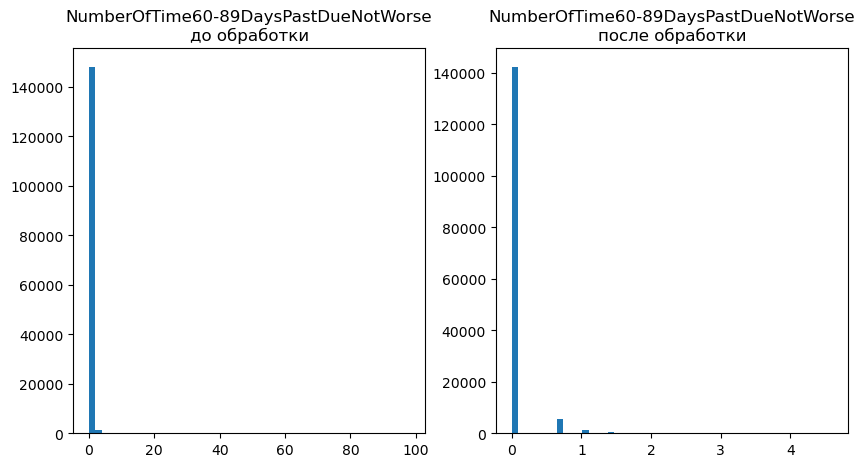

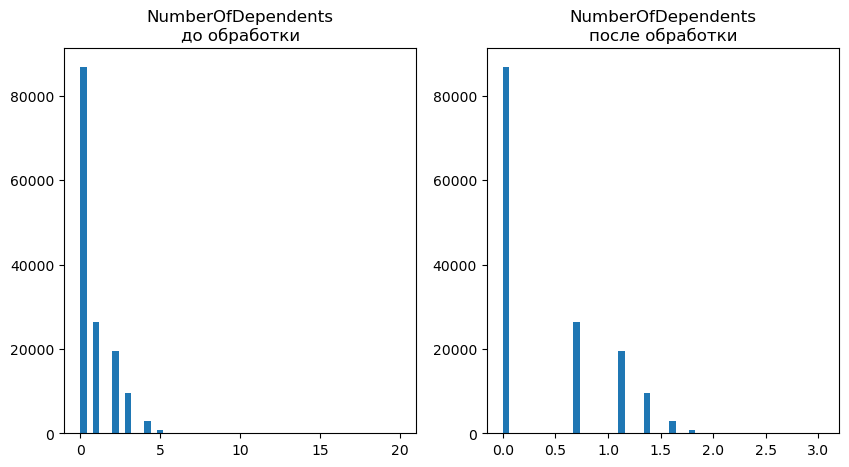

In [673]:
for feature in numerical:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
    
    ax1.hist(df[feature], bins=50)
    ax1.set_title(f'{feature}\nдо обработки')
    ax2.hist(prep_df[feature], bins=50)
    ax2.set_title(f'{feature}\nпосле обработки')
    plt.show()

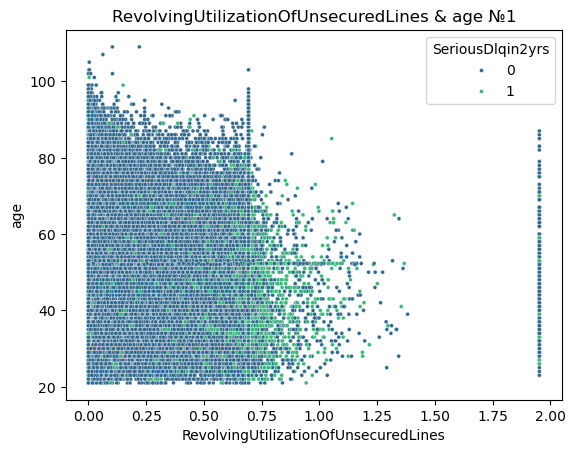

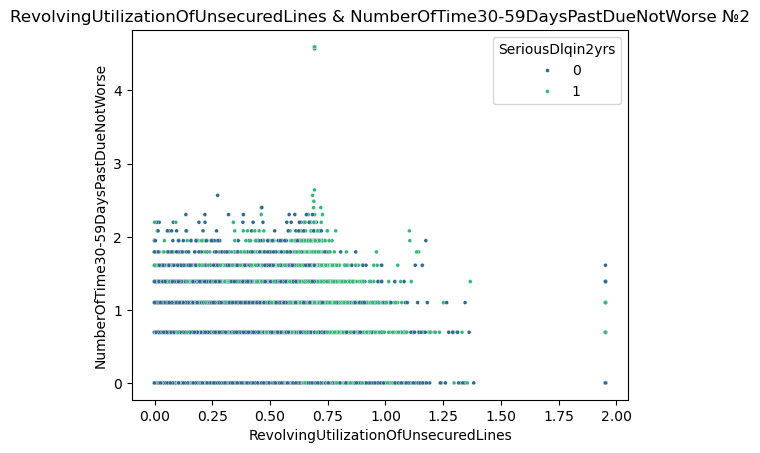

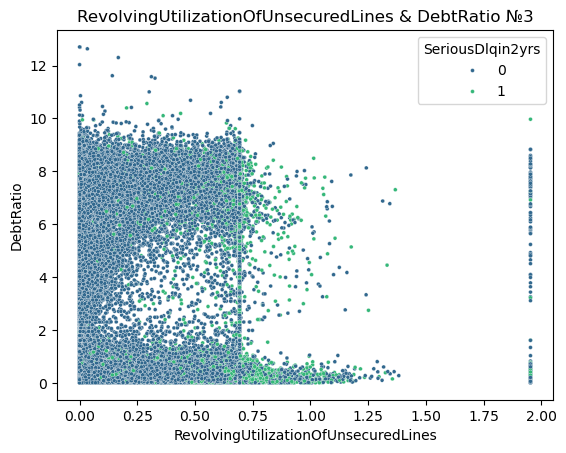

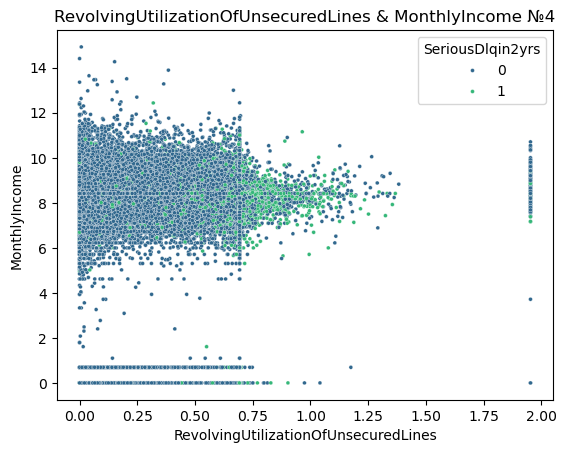

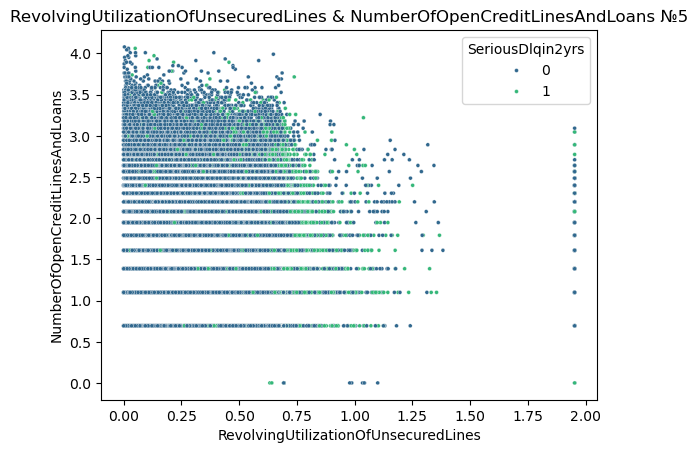

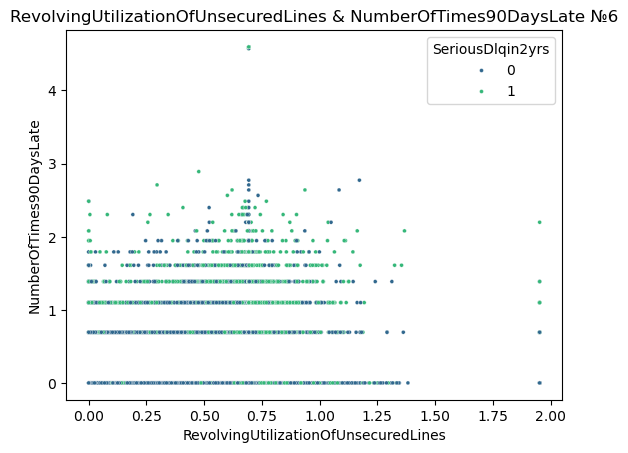

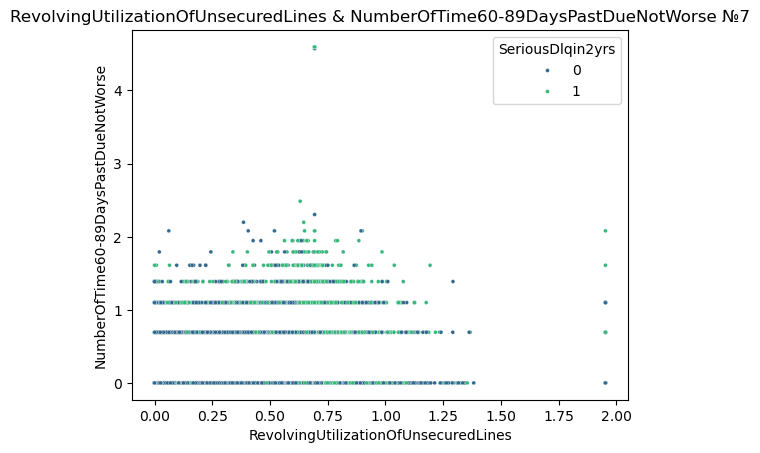

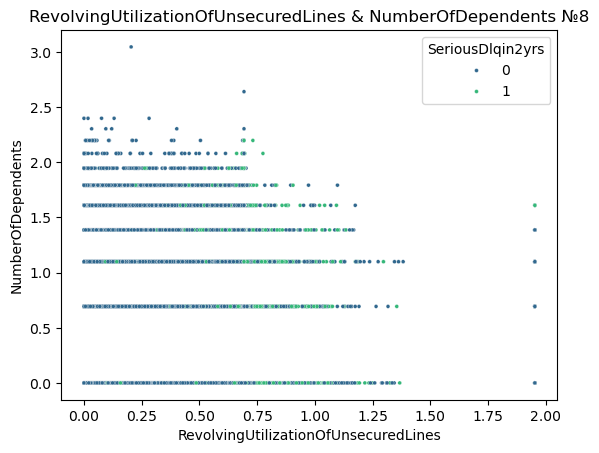

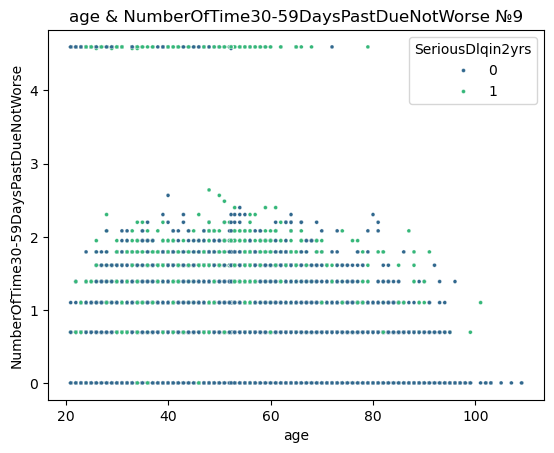

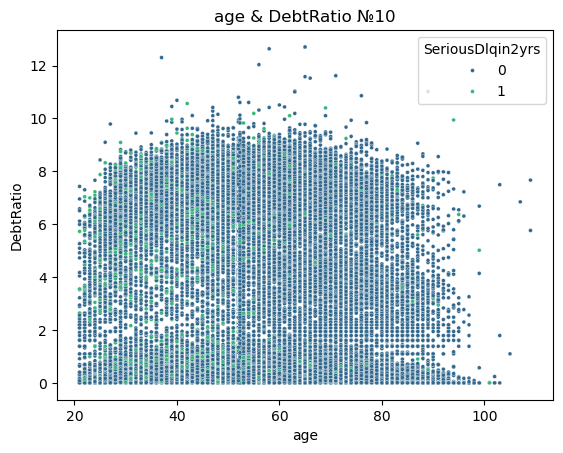

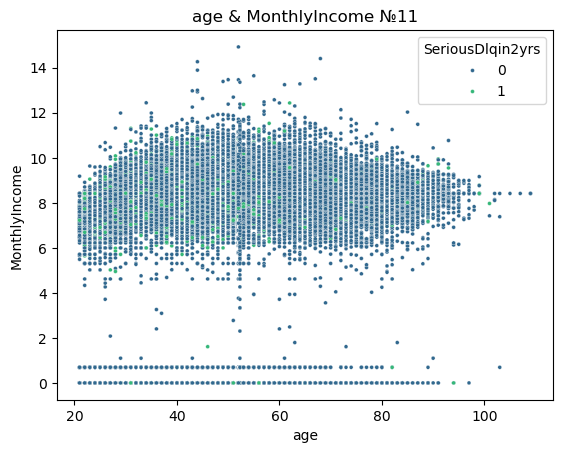

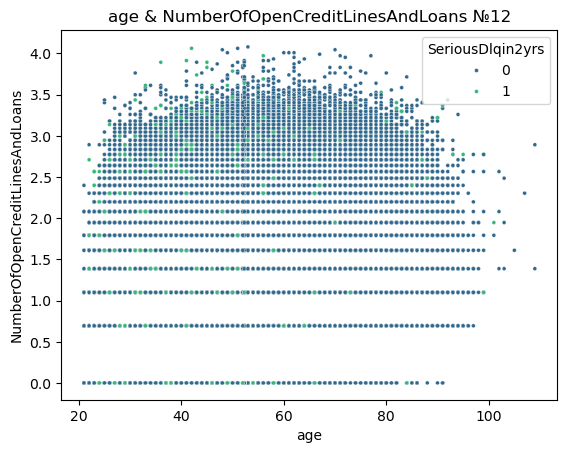

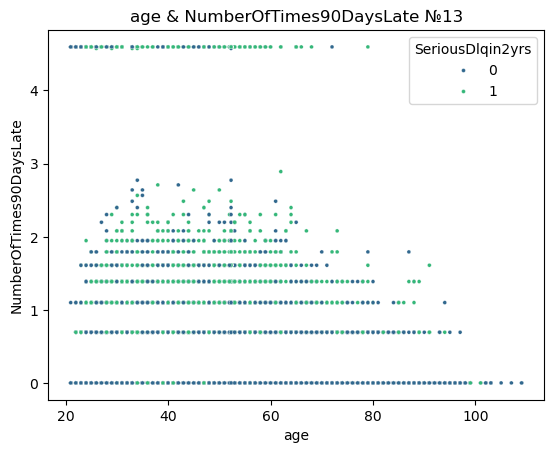

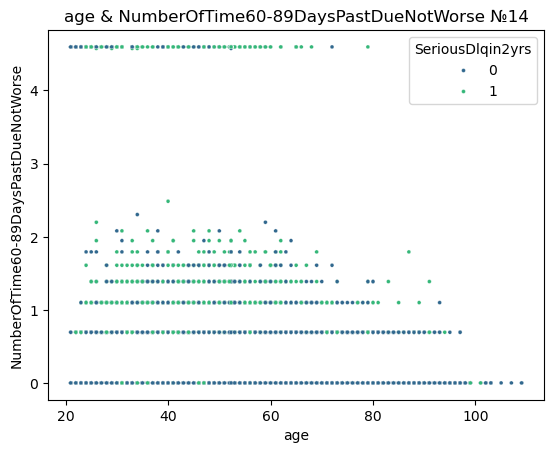

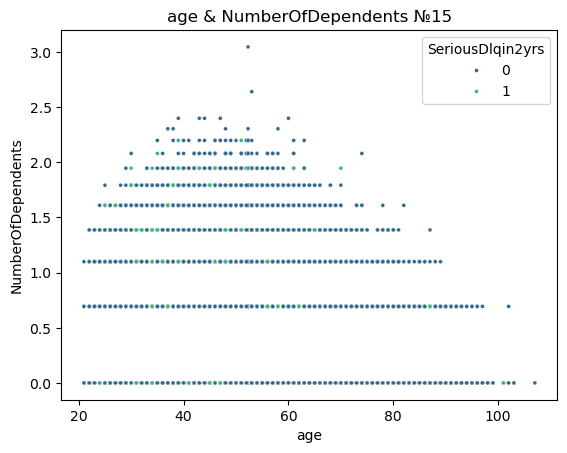

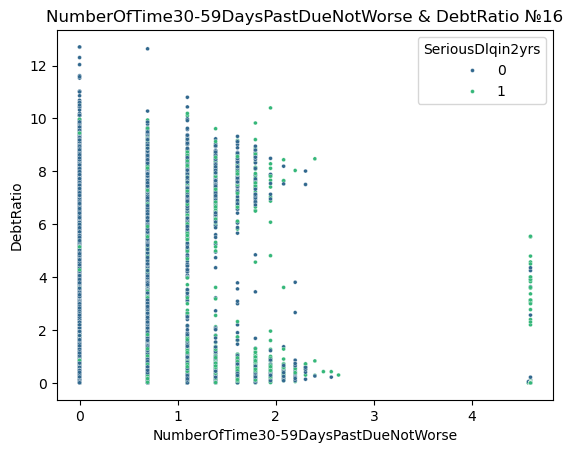

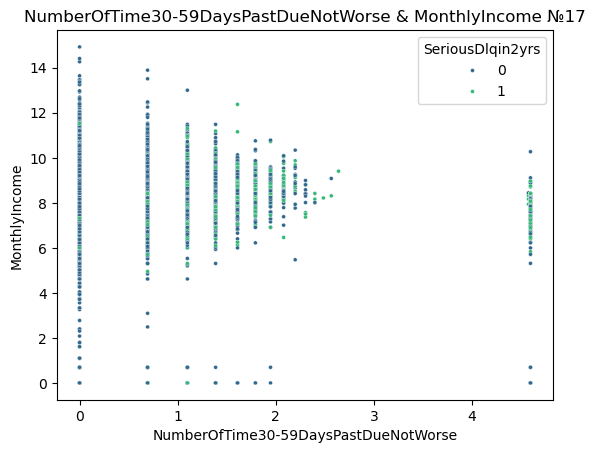

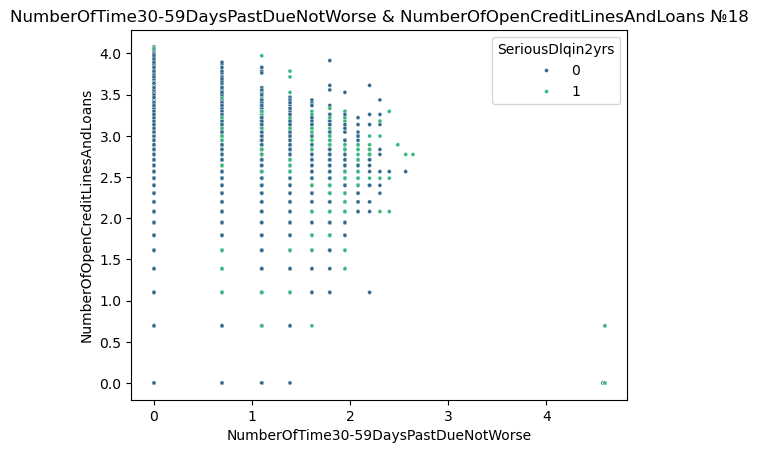

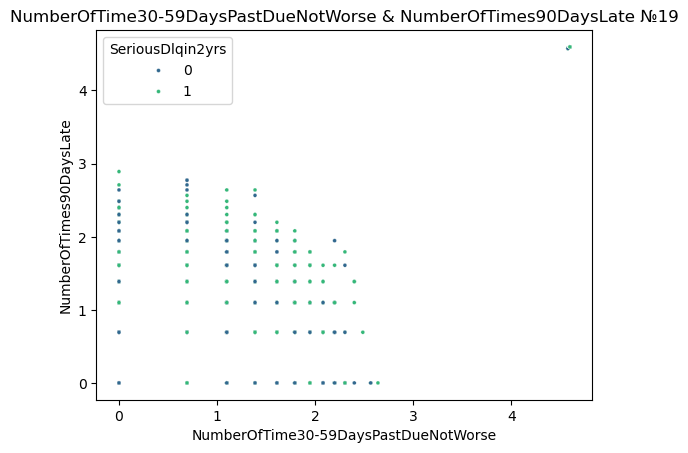

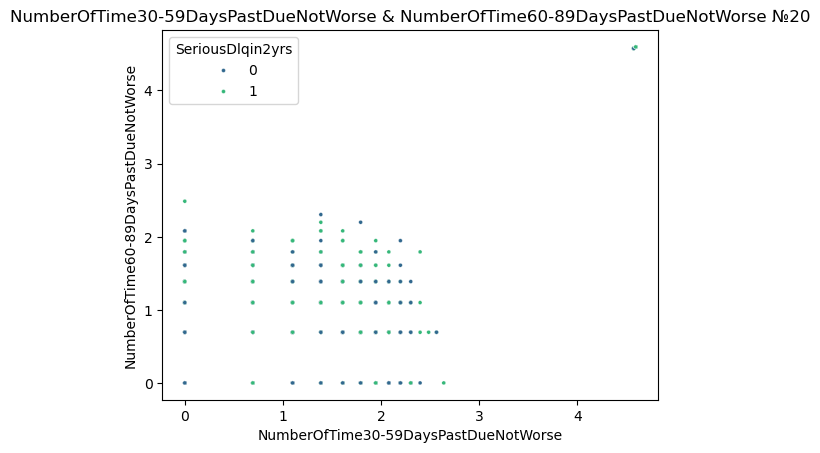

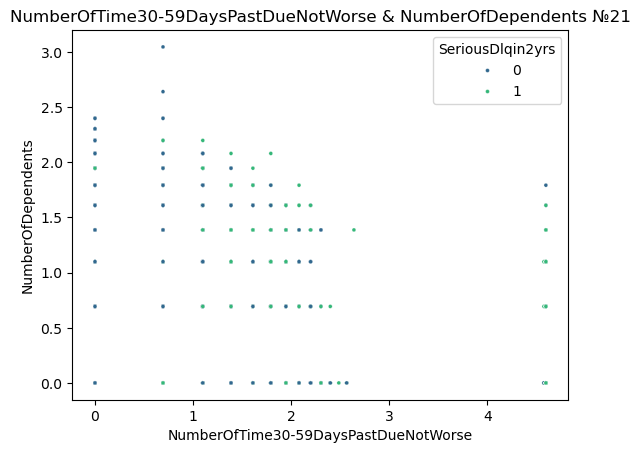

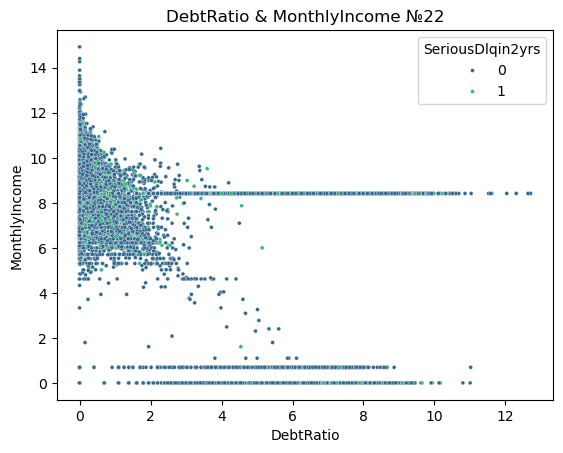

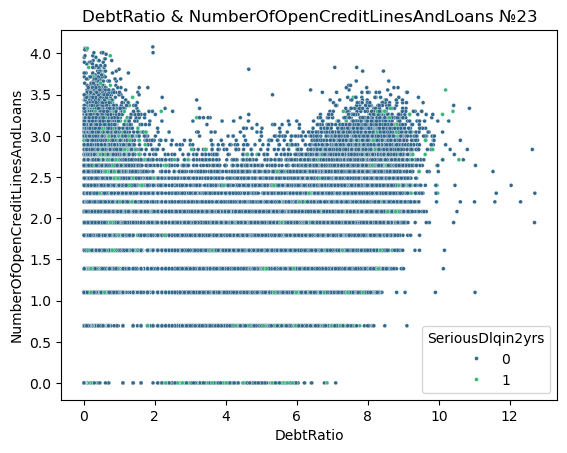

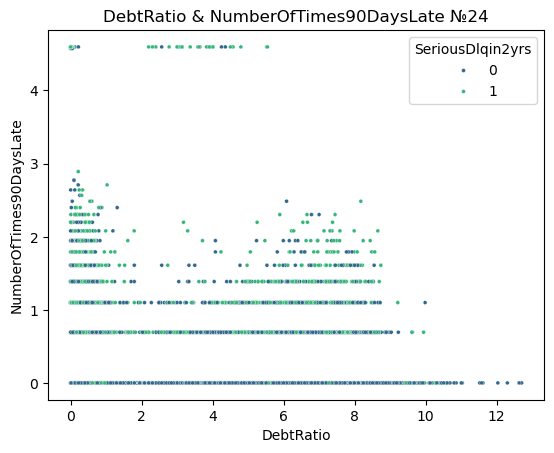

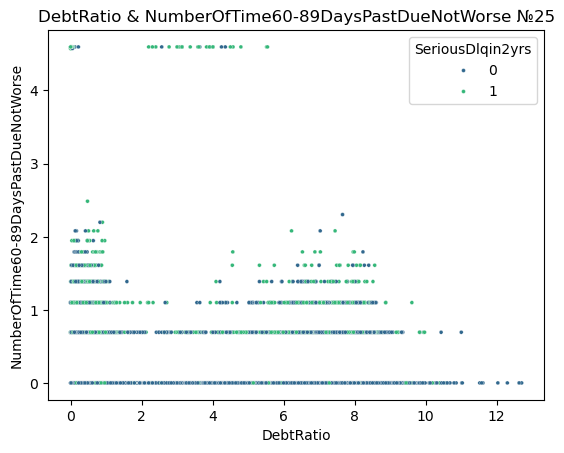

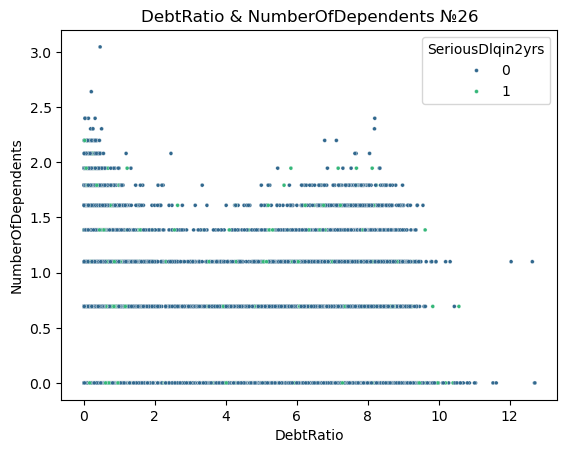

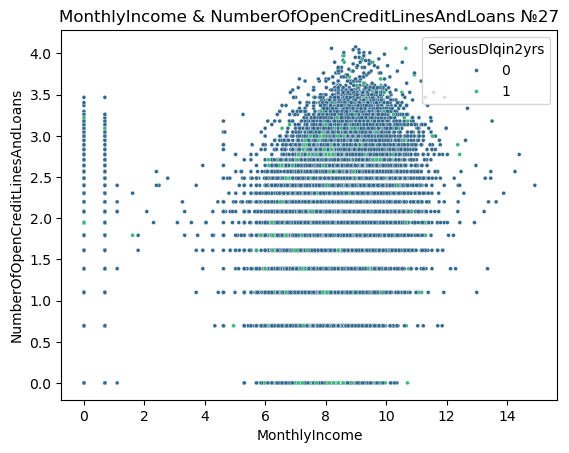

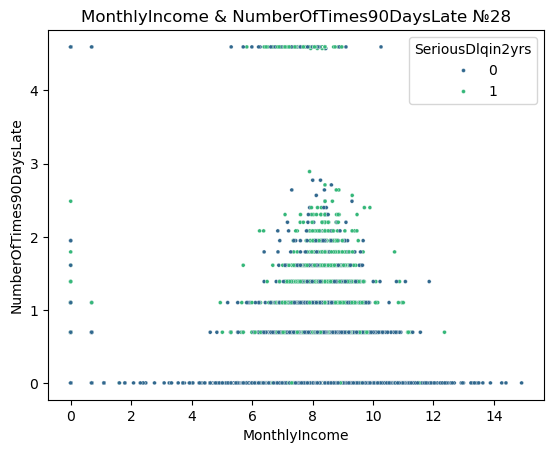

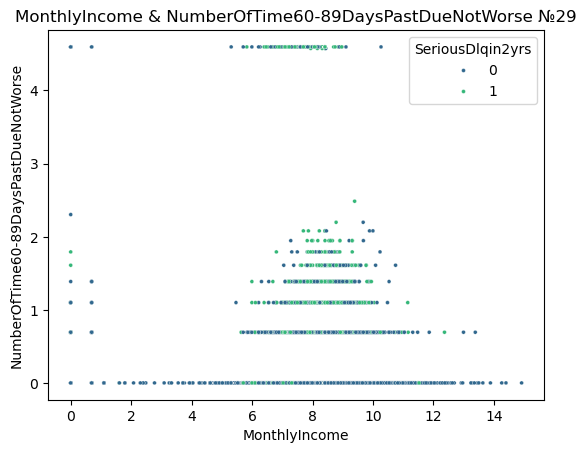

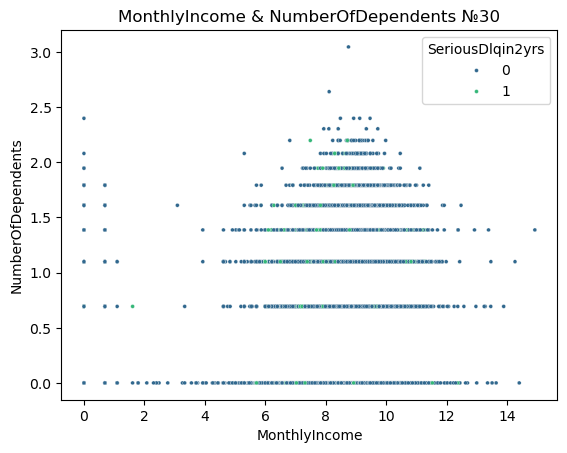

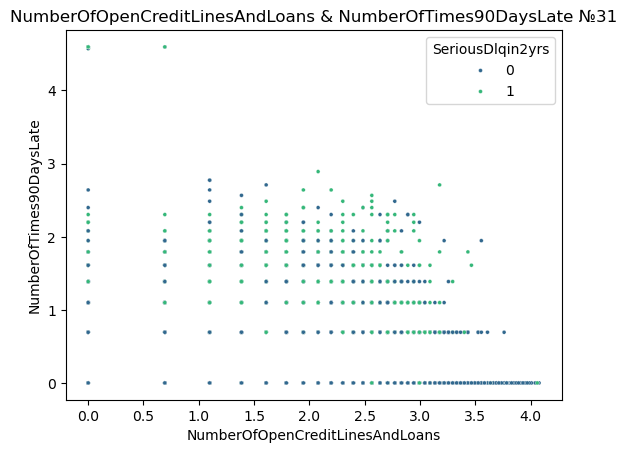

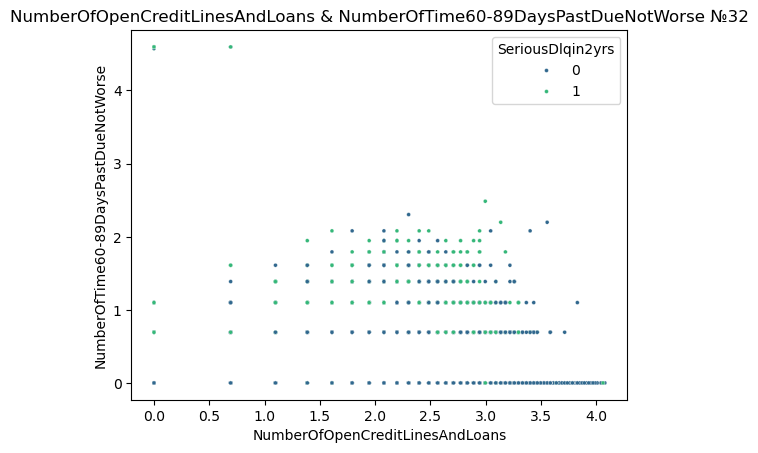

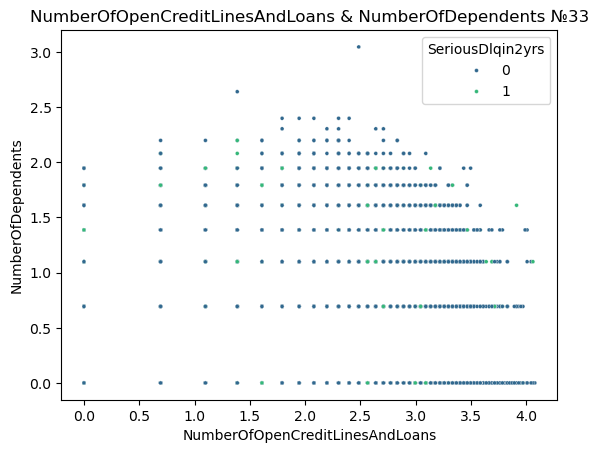

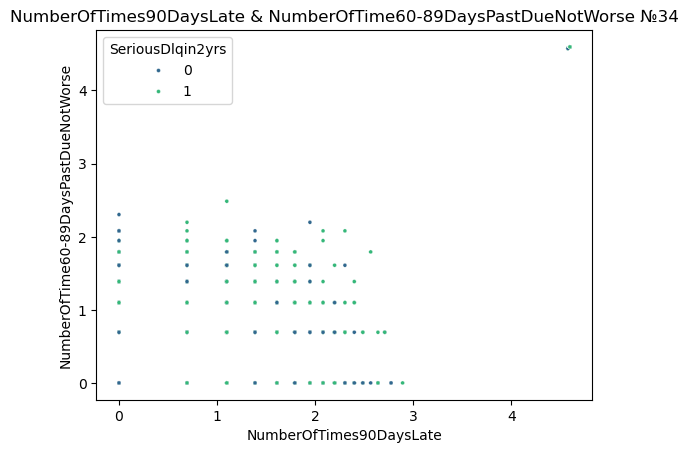

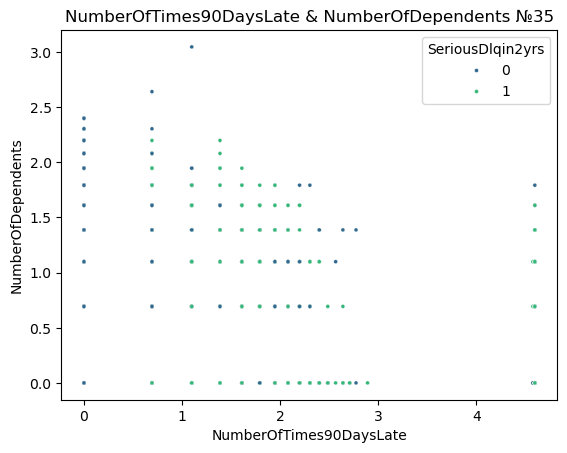

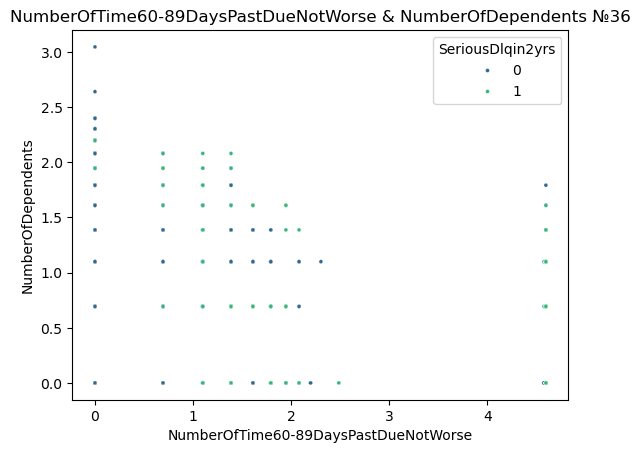

In [674]:
numerical2 = numerical
i = 0
for feature1 in numerical:
    for feature2 in [feature for feature in numerical2 if feature != feature1]:
        i+=1
        sns.scatterplot(data=prep_df, x=feature1, y=feature2, hue=aim[0], palette='viridis', s=8)
        plt.title(f'{feature1} & {feature2} №{i}')
        plt.show()
    numerical2 = [feature for feature in numerical2 if feature != feature1]

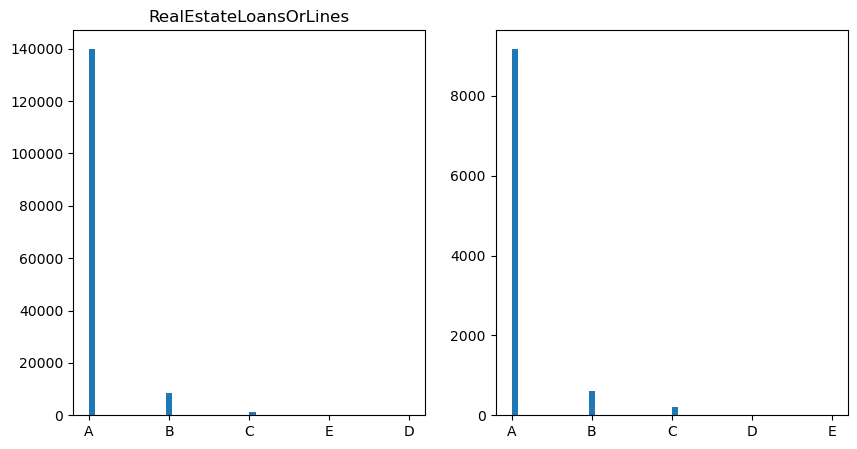

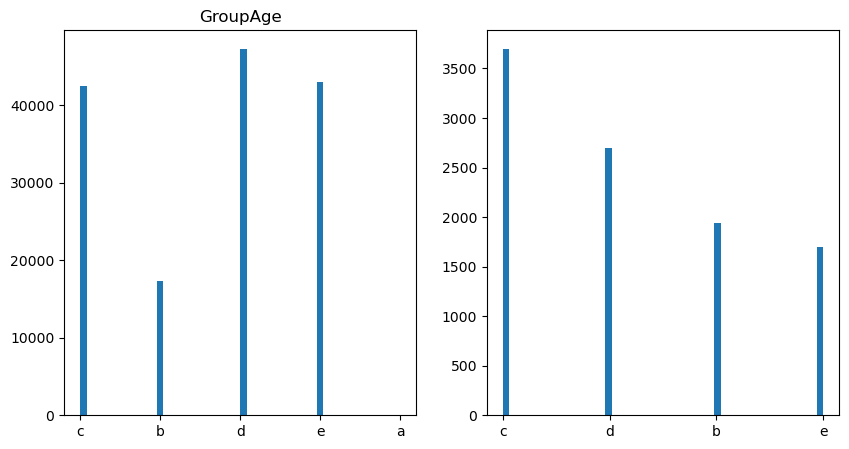

In [675]:
for feature in categorical:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5)) 
    
    ax1.hist(df[feature], bins=50)
    ax1.set_title(feature)
    ax2.hist(aim_df[feature], bins=50)
    plt.show()

In [740]:
prep_df[categorical[1]] = df[categorical[1]].replace(dict(zip(['a', 'b', 'c', 'd', 'e'], [1, 2, 3, 4, 5])))
prep_df[categorical[1]]

C:\Users\Elena\AppData\Local\Temp\ipykernel_7840\1718386043.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prep_df[categorical[1]] = df[categorical[1]].replace(dict(zip(['a', 'b', 'c', 'd', 'e'], [1, 2, 3, 4, 5])))


0         3
1         2
2         3
3         2
4         4
         ..
149995    4
149996    4
149997    5
149998    3
149999    3
Name: GroupAge, Length: 150000, dtype: int64

In [754]:
prep_df[categorical[0]] = df[categorical[0]].replace(dict(zip(['A', 'B', 'C', 'D', 'E'], [1, 2, 3, 4, 5])))
prep_df[categorical[0]]

C:\Users\Elena\AppData\Local\Temp\ipykernel_7840\3066993555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prep_df[categorical[0]] = df[categorical[0]].replace(dict(zip(['A', 'B', 'C', 'D', 'E'], [1, 2, 3, 4, 5])))


0         1
1         1
2         1
3         1
4         1
         ..
149995    1
149996    1
149997    1
149998    1
149999    1
Name: RealEstateLoansOrLines, Length: 150000, dtype: int64

In [744]:
categorical[1:]

['GroupAge']

<Axes: >

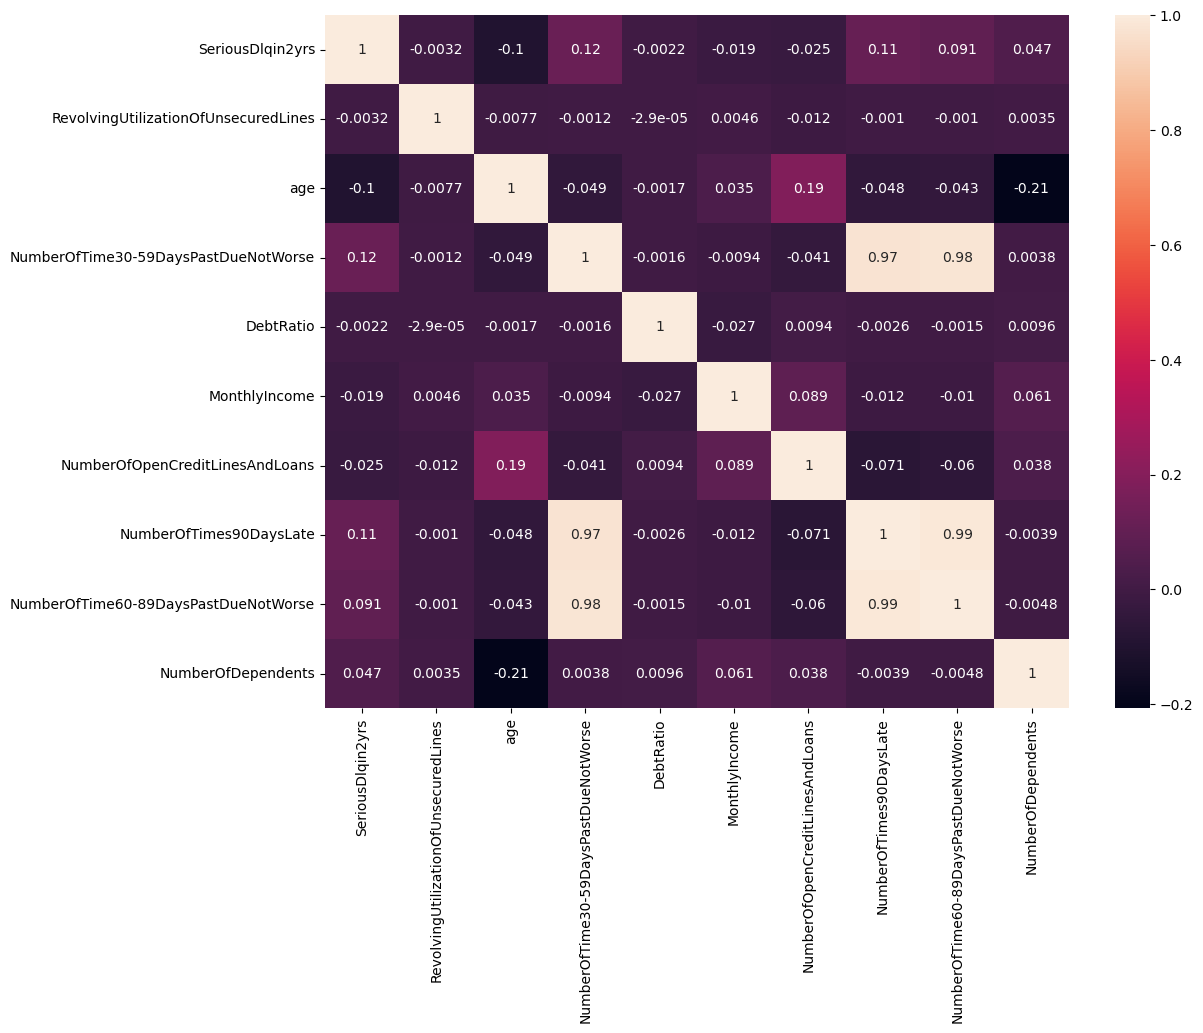

In [746]:
plt.figure(figsize=(12,9))

c = df.dropna()[aim + numerical].corr()
sns.heatmap(c, annot=True)

# Видим, что после обработки были значительно улучшены показатели корреляции!

<Axes: >

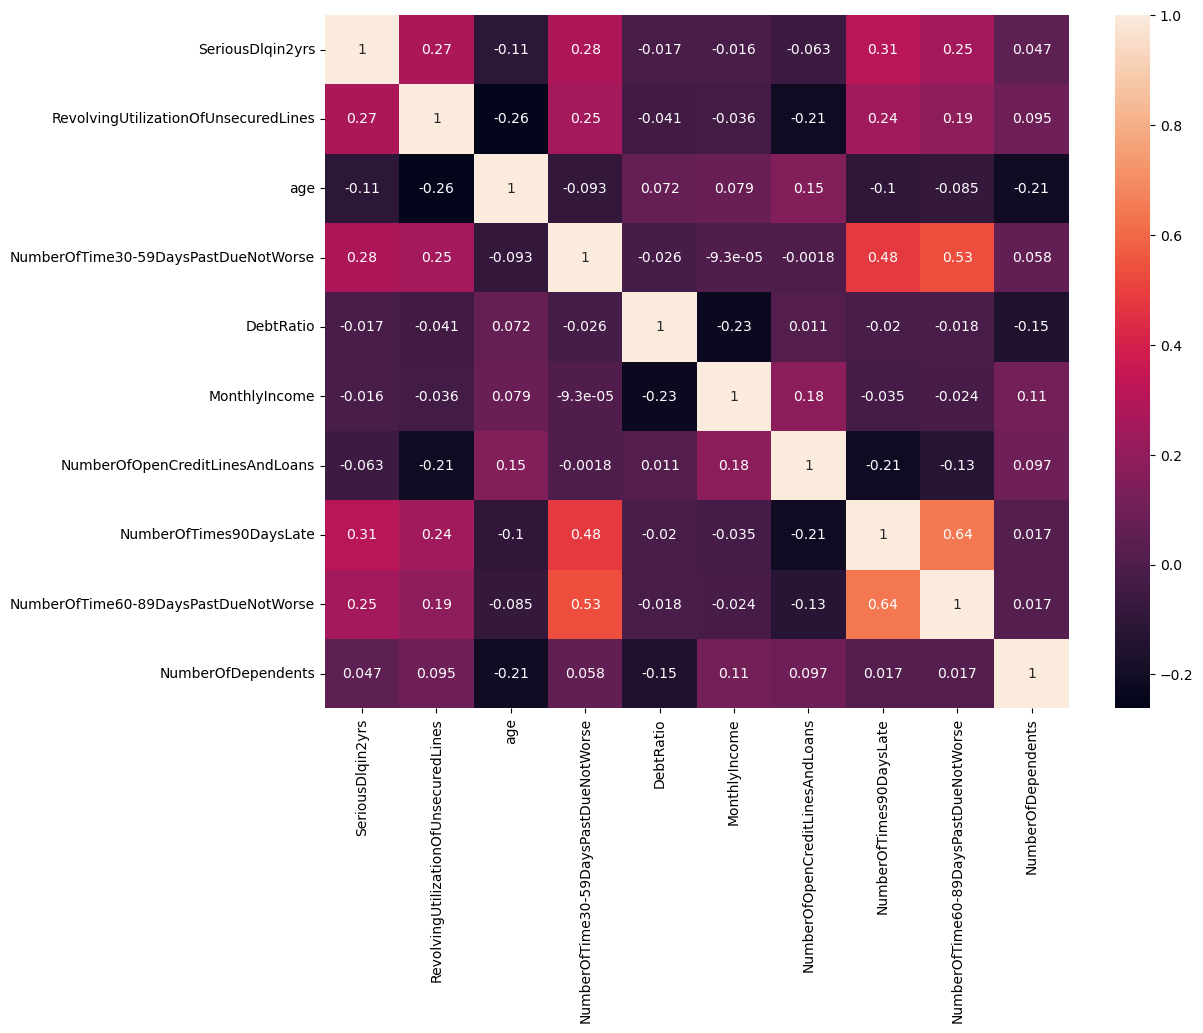

In [768]:
plt.figure(figsize=(12,9))

c = prep_df[aim + numerical].corr()
sns.heatmap(c, annot=True)

In [772]:
prep_df = prep_df.dropna()

In [810]:
from sklearn.model_selection import train_test_split

X = prep_df[numerical]
y = prep_df[aim]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((109557, 9), (36519, 9))

In [836]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs

C:\Users\Elena\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Elena\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[0.97181354, 0.02818646],
       [0.94350849, 0.05649151],
       [0.96565354, 0.03434646],
       ...,
       [0.97926085, 0.02073915],
       [0.98222884, 0.01777116],
       [0.98740391, 0.01259609]])

In [878]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

pred = probs[:,1] > 0.06
m = confusion_matrix(y_test, pred)
print('Accuracy:', accuracy_score(y_test, pred), 'Precision:' ,m[1, 1] / np.sum(m[1]))
m

Accuracy: 0.7451189791615324 Precision: 0.7954545454545454


array([[25251,  8804],
       [  504,  1960]], dtype=int64)